<a href="https://colab.research.google.com/github/shesha03/Air-Quality-Predictive-System/blob/main/AirQuality-system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

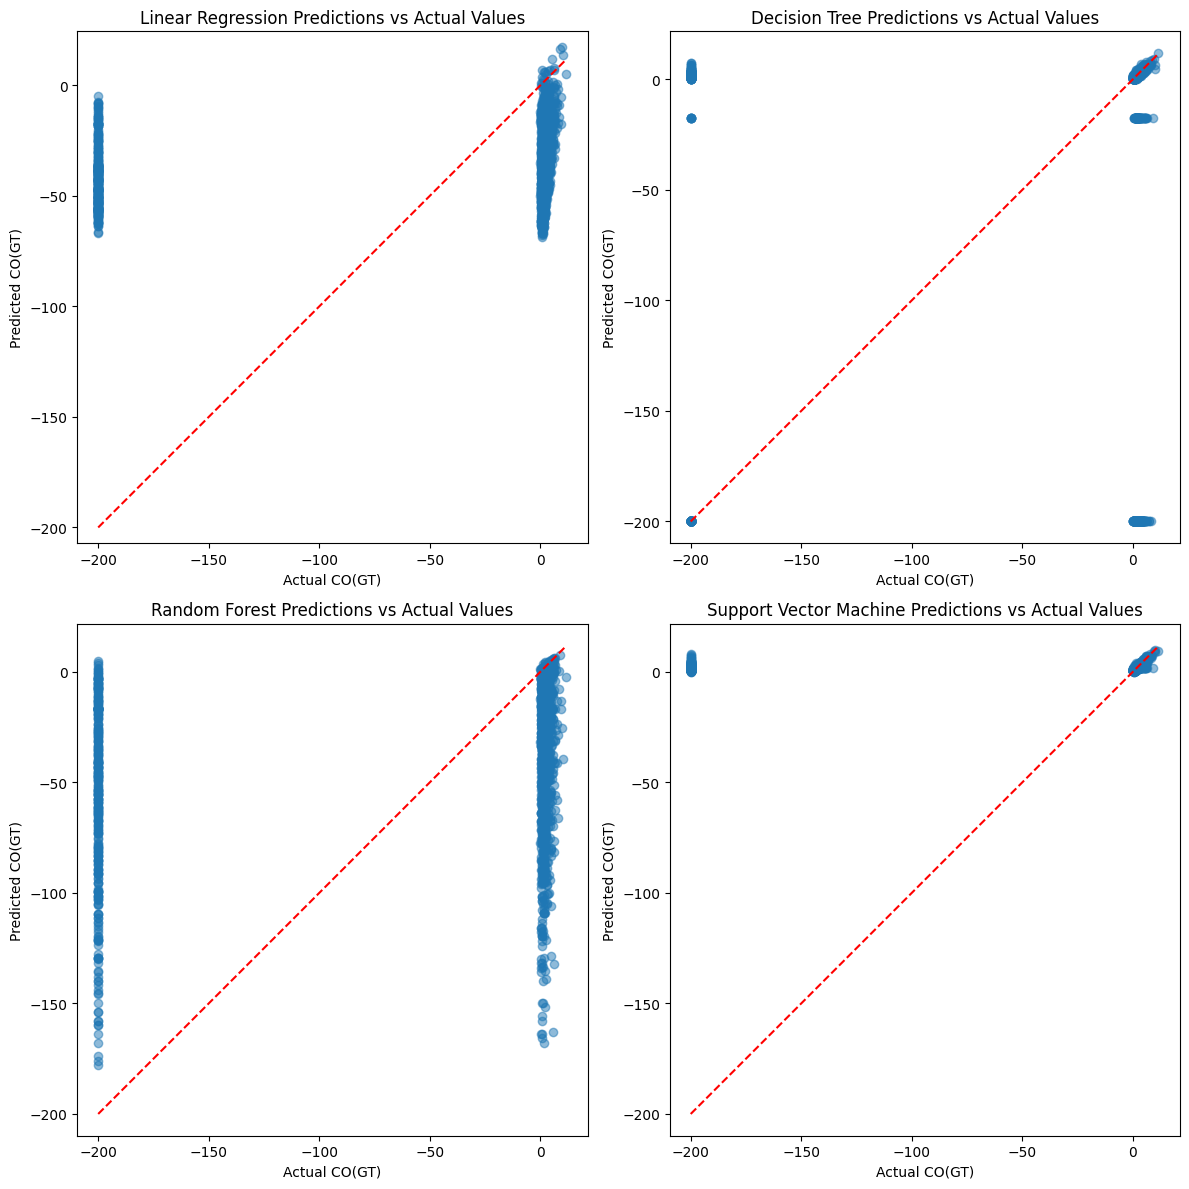

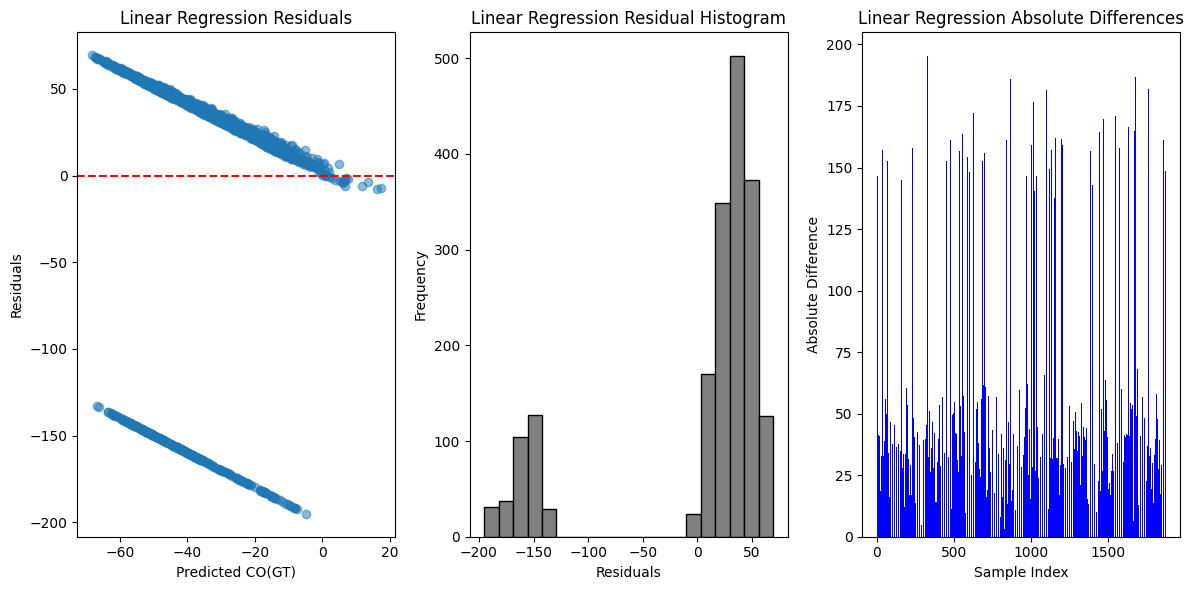

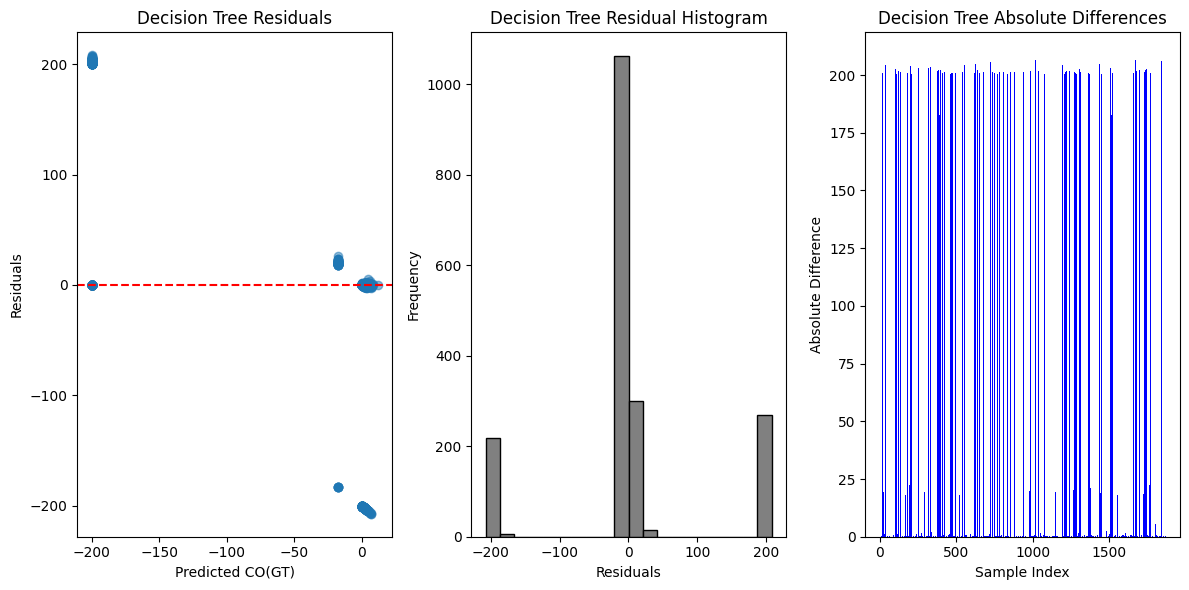

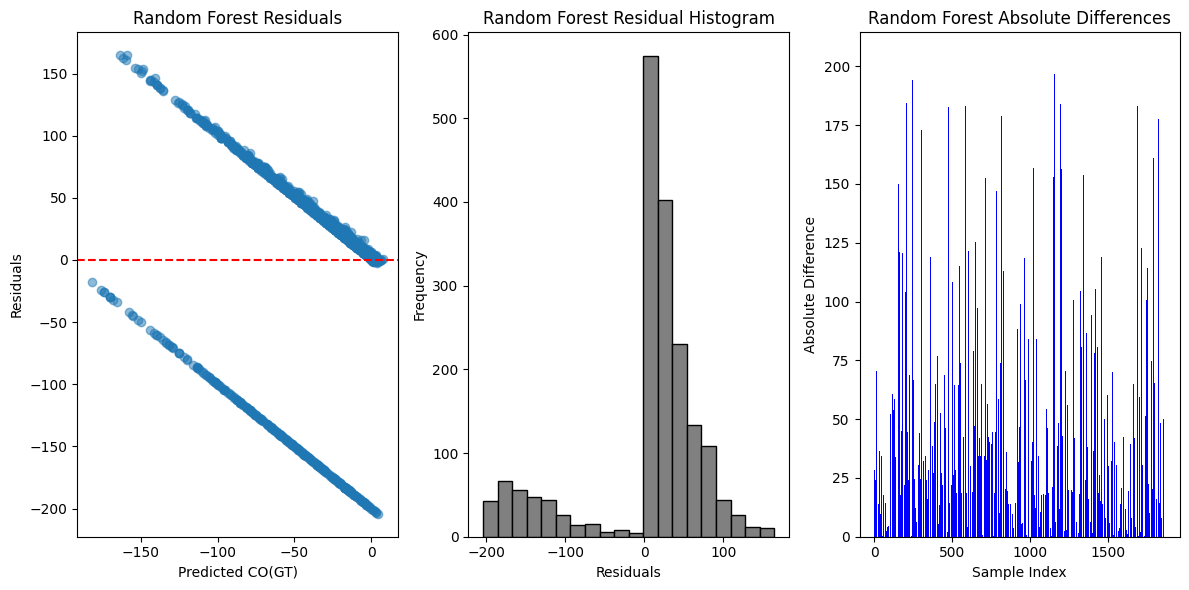

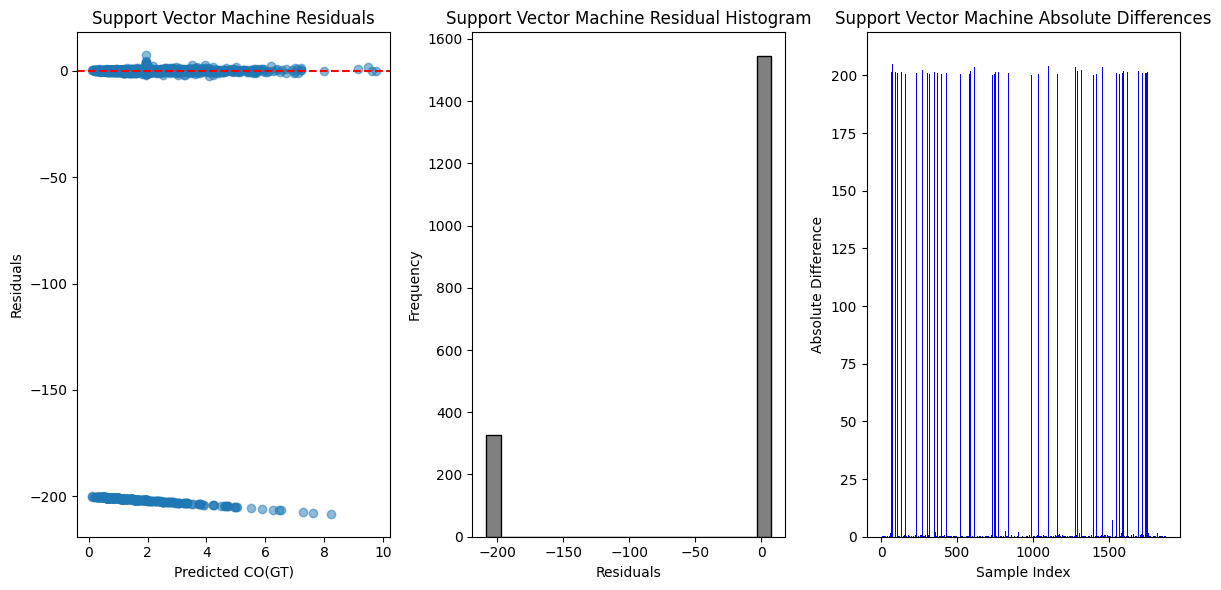

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Install openpyxl if you haven't already
!pip install openpyxl

# Load the air quality dataset using pd.read_excel
# This is the correct way to read .xlsx files
data = pd.read_excel('/content/AirQualityUCI.xlsx', engine='openpyxl')
# Display the first few rows and check for null values
print(data.head())
print(data.isnull().sum())

# Preprocessing (drop columns with many null values or rows if necessary)
data.dropna(inplace=True)  # Remove rows with NaN values (consider a more sophisticated approach as needed)

# Features and target variable (example: using CO(GT) as the target)
X = data[['C6H6(GT)', 'T', 'RH', 'AH']]  # Features (select columns based on your analysis)
y = data['CO(GT)']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(kernel='linear')
}

# Store accuracies for each model
accuracies = {}

# Create a figure for plotting with square aspect ratio
plt.figure(figsize=(12, 12))  # You can adjust this size for better visibility

# Iterate over models, train, predict, and evaluate
for i, (name, model) in enumerate(models.items(), start=1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute accuracy metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracies[name] = {
        'MSE': mse,
        'R2 Score': r2
    }
    print(f'{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}')

    # Create a subplot for each model with equal aspect ratio
    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Diagonal line for reference
    plt.title(f'{name} Predictions vs Actual Values')
    plt.xlabel('Actual CO(GT)')
    plt.ylabel('Predicted CO(GT)')

    # Set equal scaling for both axes
    plt.axis('equal')  # Ensures the x and y axes are equally scaled

plt.tight_layout()
plt.show()

# Additional plots to visualize the difference between predicted and actual values
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate residuals
    residuals = y_test - y_pred

    # Residual plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'{name} Residuals')
    plt.xlabel('Predicted CO(GT)')
    plt.ylabel('Residuals')

    # Histogram of residuals
    plt.subplot(1, 3, 2)
    plt.hist(residuals, bins=20, color='gray', edgecolor='orange')
    plt.title(f'{name} Residual Histogram')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Bar plot of differences
    plt.subplot(1, 3, 3)
    plt.bar(range(len(y_test)), np.abs(residuals), color='blue')
    plt.title(f'{name} Absolute Differences')
    plt.xlabel('Sample Index')
    plt.ylabel('Absolute Difference')

    plt.tight_layout()
    plt.show()

Linear Regression - MSE: 5623.54, R2 Score: 0.05


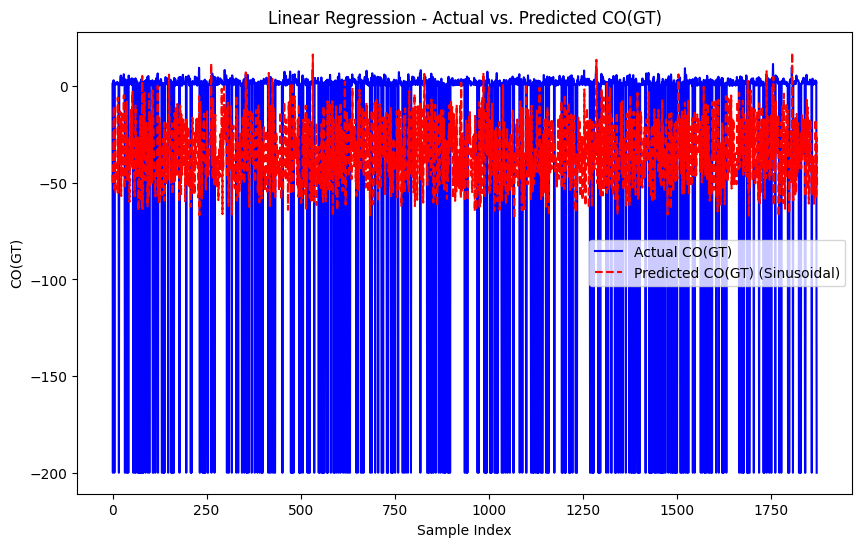

Decision Tree - MSE: 10708.41, R2 Score: -0.81


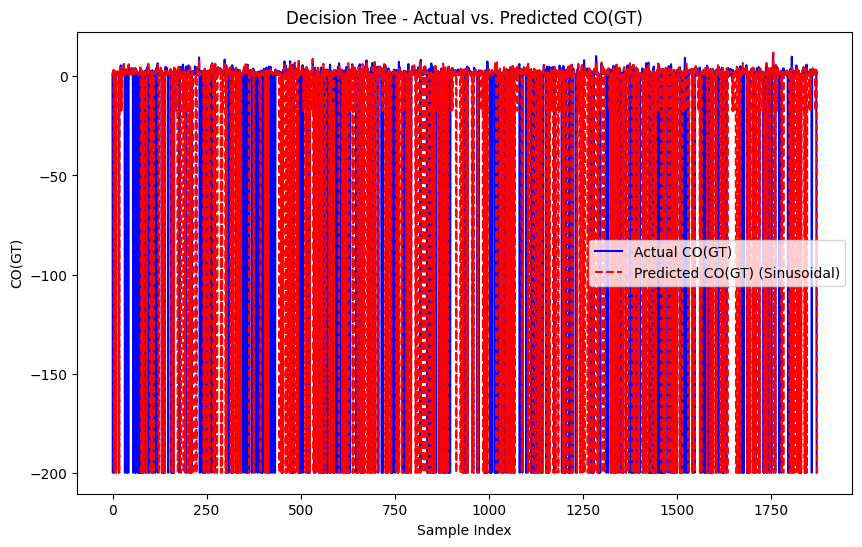

Random Forest - MSE: 5516.96, R2 Score: 0.07


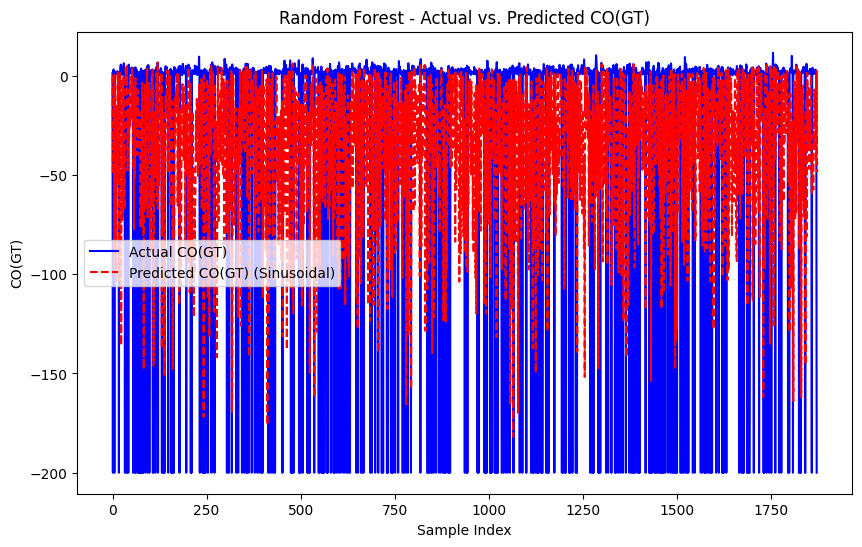

Support Vector Machine - MSE: 7128.99, R2 Score: -0.21


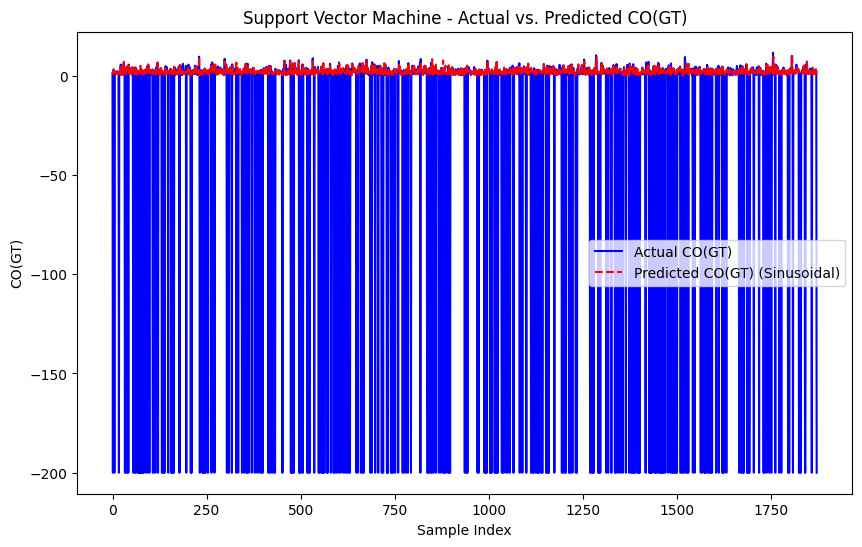

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# Plotting and comparison for each algorithm
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Generate x-axis values for the sinusoidal curve
    x_sin = np.linspace(0, len(y_test), len(y_test))

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot actual values as a line graph
    ax.plot(y_test.values, label='Actual CO(GT)', color='blue')

    # Plot predicted values as a sinusoidal graph
    ax.plot(x_sin, y_pred, label='Predicted CO(GT) (Sinusoidal)', color='red', linestyle='--')

    # Set labels and title
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('CO(GT)')
    ax.set_title(f'{name} - Actual vs. Predicted CO(GT)')

    # Add legend
    ax.legend()

    # Compute and display accuracy metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}')

    # Show the plot
    plt.show()

Linear Regression - MSE: 5623.54, R2 Score: 0.05


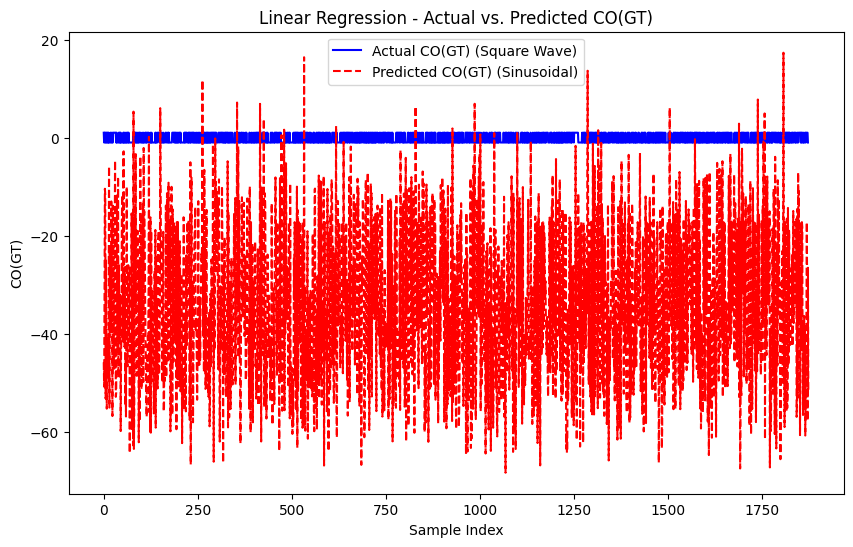

Decision Tree - MSE: 10683.84, R2 Score: -0.81


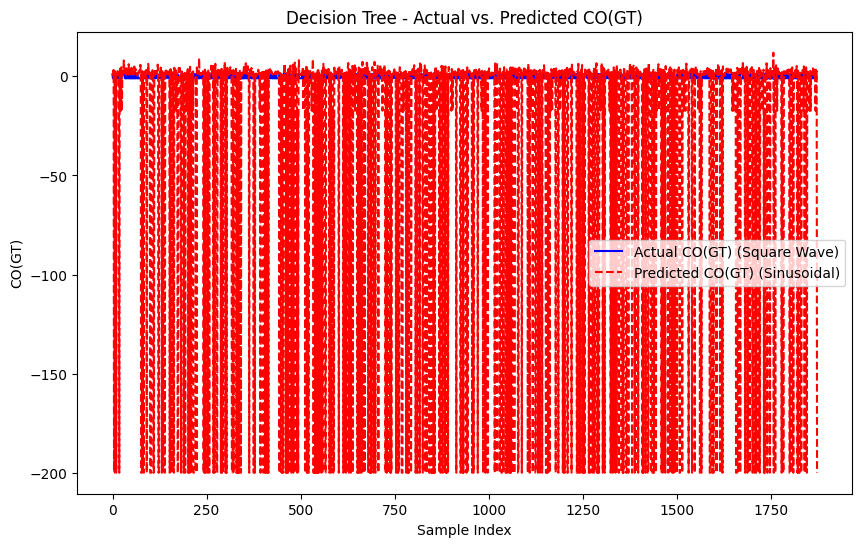

Random Forest - MSE: 5532.67, R2 Score: 0.06


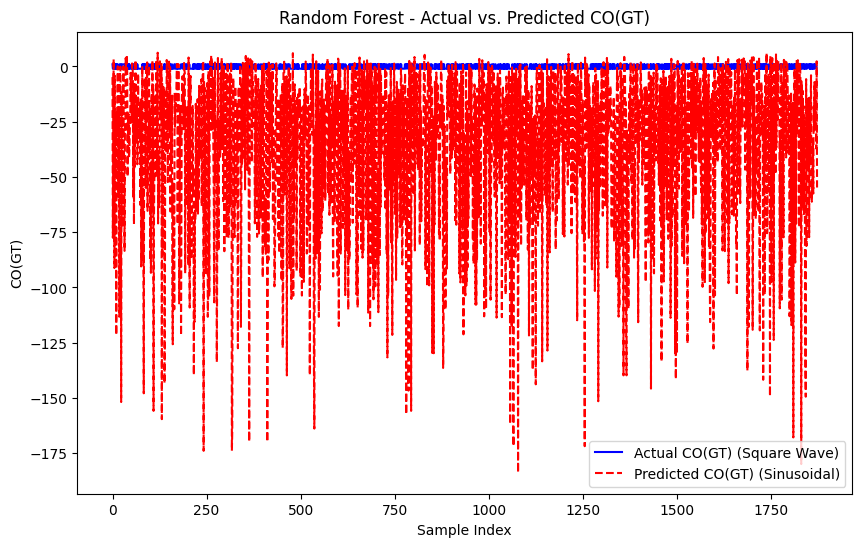

Support Vector Machine - MSE: 7128.99, R2 Score: -0.21


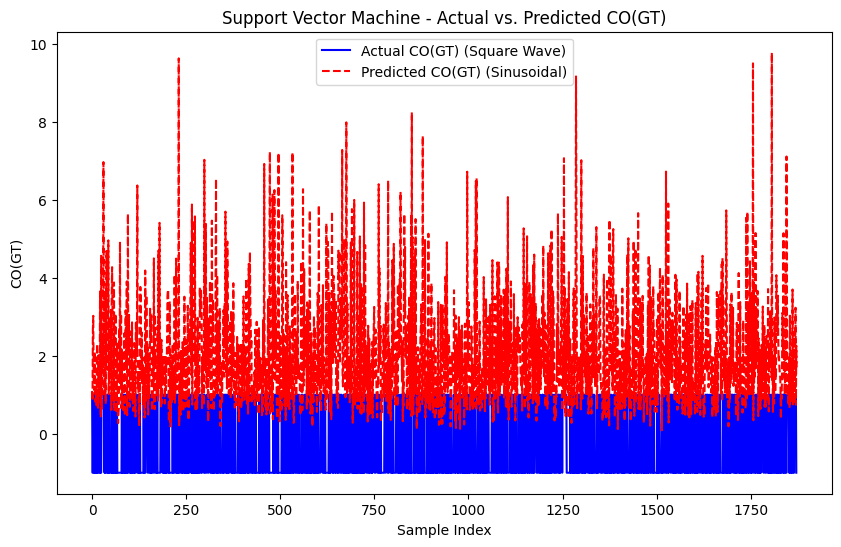

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from scipy import signal


# Plotting and comparison for each algorithm
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Generate x-axis values for the sinusoidal curve
    x_sin = np.linspace(0, len(y_test), len(y_test))

    # Generate square wave for actual values
    y_square = signal.square(2 * np.pi * y_test.values)  # Adjust frequency as needed

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot actual values as a square wave
    ax.plot(y_square, label='Actual CO(GT) (Square Wave)', color='blue')

    # Plot predicted values as a sinusoidal graph
    ax.plot(x_sin, y_pred, label='Predicted CO(GT) (Sinusoidal)', color='red', linestyle='--')

    # Set labels and title
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('CO(GT)')
    ax.set_title(f'{name} - Actual vs. Predicted CO(GT)')

    # Add legend
    ax.legend()

    # Compute and display accuracy metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}')

    # Show the plot
    plt.show()

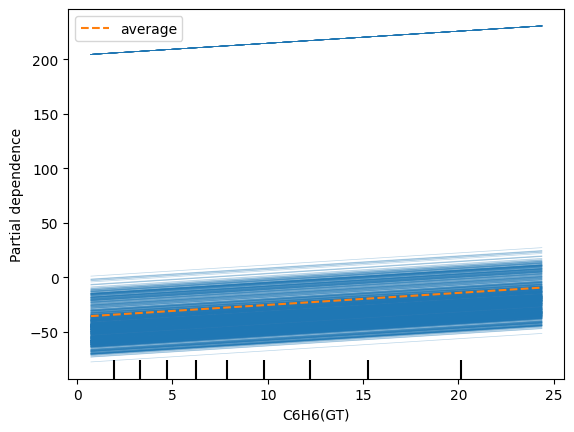

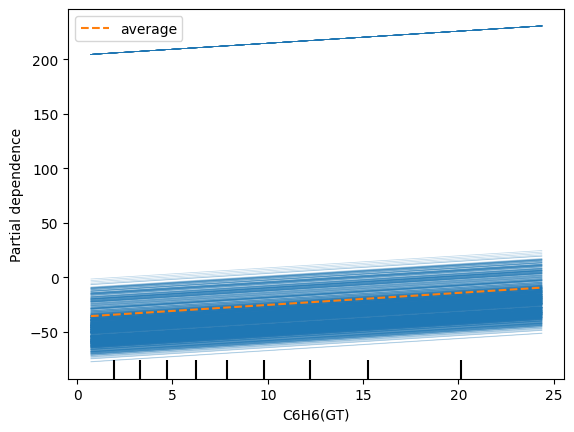

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


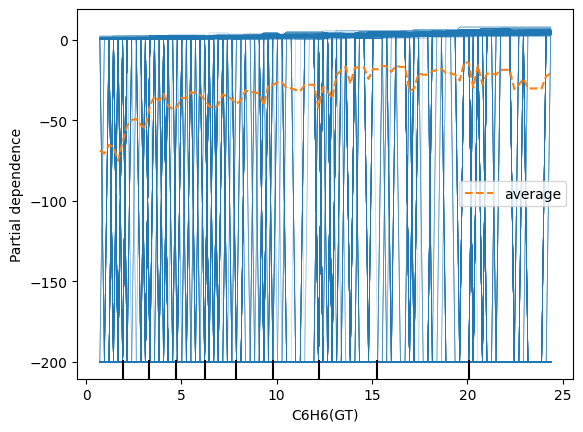

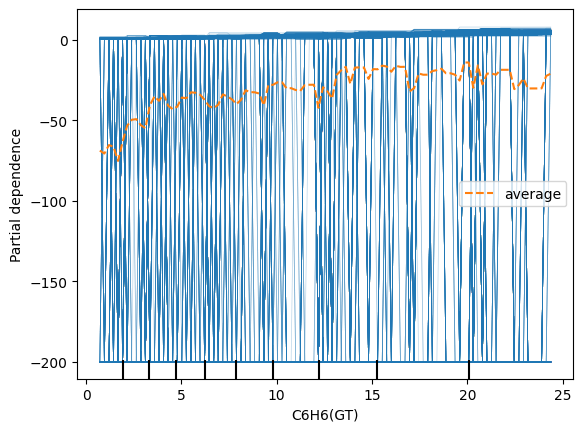

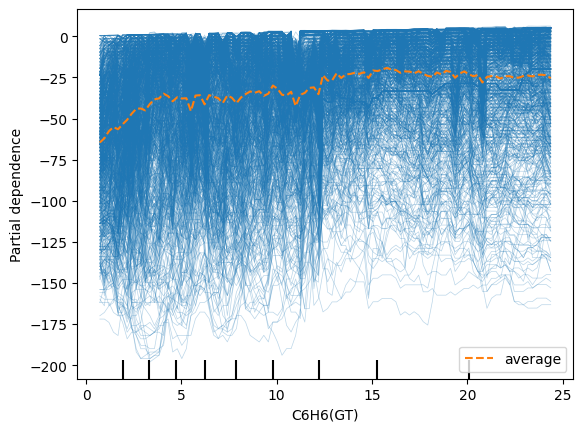

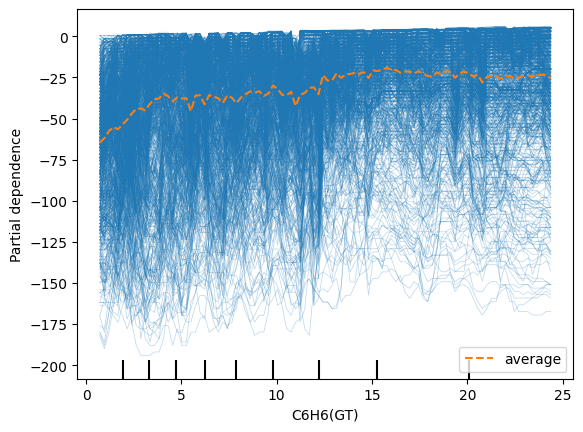

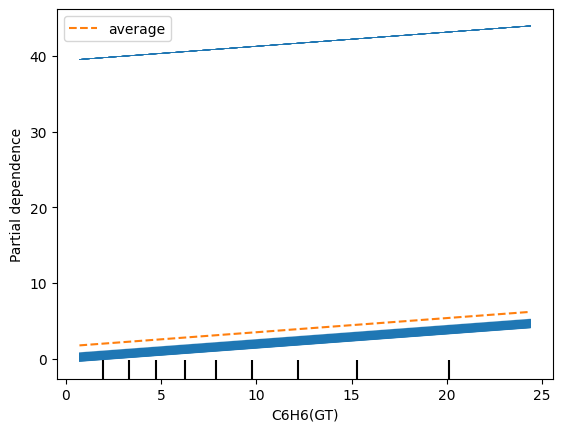

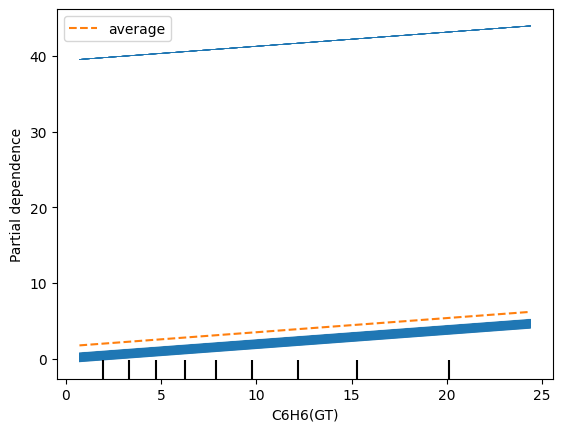

In [ ]:
# Magnitude of Change in CO(GT) with Changing Variables (Partial Dependence Plot & ICE Plot):

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay  # Import for visualization

!pip install scikit-learn -U

data = pd.read_excel('/content/AirQualityUCI.xlsx', engine='openpyxl')

data.dropna(inplace=True)

X = data[['C6H6(GT)', 'T', 'RH', 'AH']]  #
y = data['CO(GT)']  # Target variable

# Define algorithms  -- This part was missing from your code
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(kernel='linear')
}

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plotting and comparison for each algorithm
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    features = ['C6H6(GT)']
    display = PartialDependenceDisplay.from_estimator(
        model,
        X_train,
        features,
        kind="both",
    )

    display.plot()  # Use display.plot() to show the plot
    plt.show()

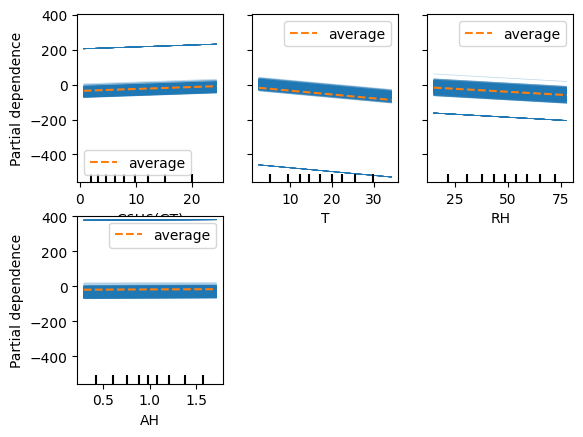

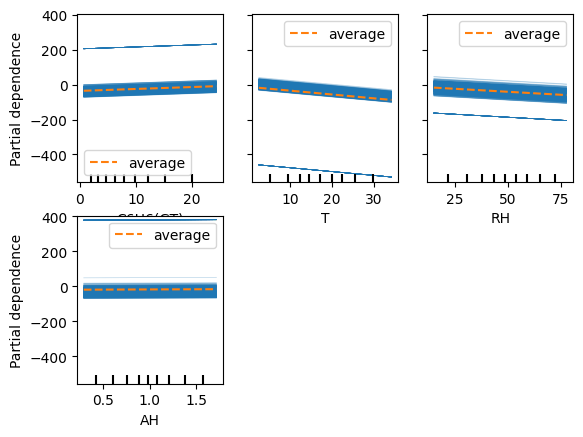

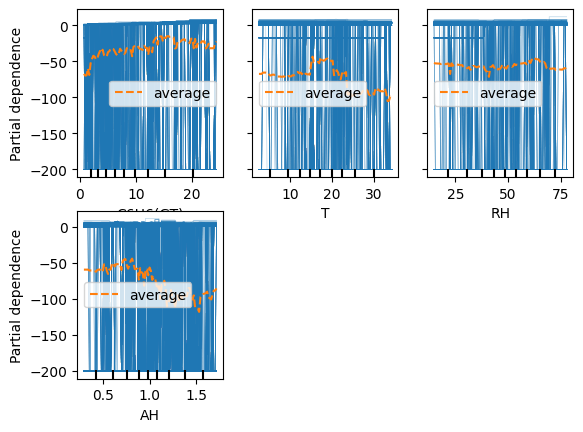

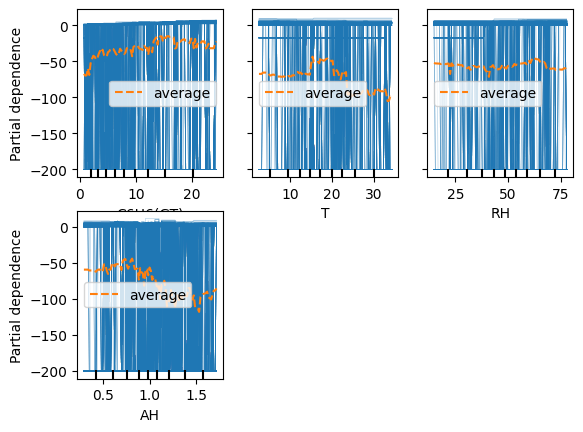

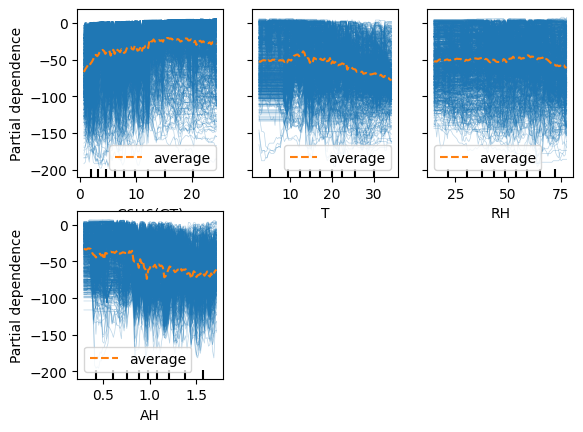

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


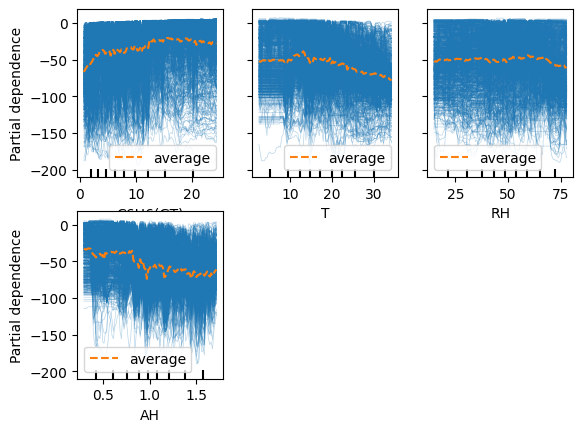

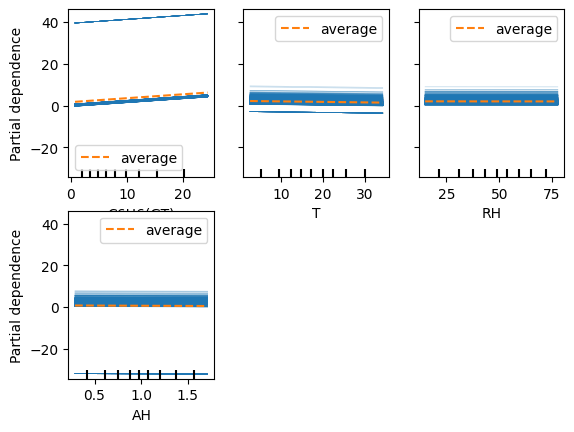

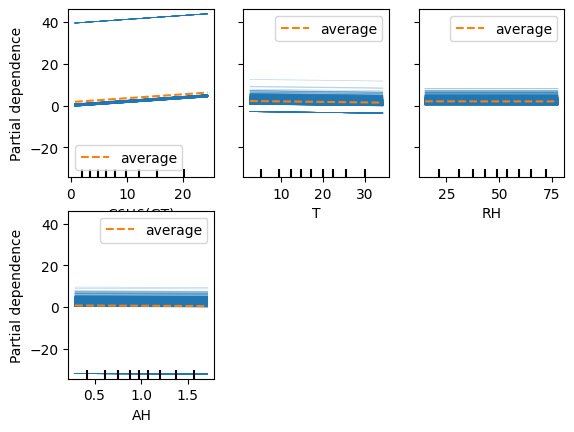

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.inspection import partial_dependence  # Import partial_dependence instead of plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay  # Import for visualization

!pip install scikit-learn -U

data = pd.read_excel('/content/AirQualityUCI.xlsx', engine='openpyxl')

data.dropna(inplace=True)

# Features and target variable (example: using CO(GT) as the target)
X = data[['C6H6(GT)', 'T', 'RH', 'AH']]
y = data['CO(GT)']  # Target variable

# Define algorithms  -- This part was missing from your code
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(kernel='linear')
}

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plotting and comparison for each algorithm
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    features = ['C6H6(GT)', 'T', 'RH', 'AH']
    display = PartialDependenceDisplay.from_estimator(
        model,
        X_train,
        features,
        kind="both",
    )

    display.plot()  # Use display.plot() to show the plot
    plt.show()

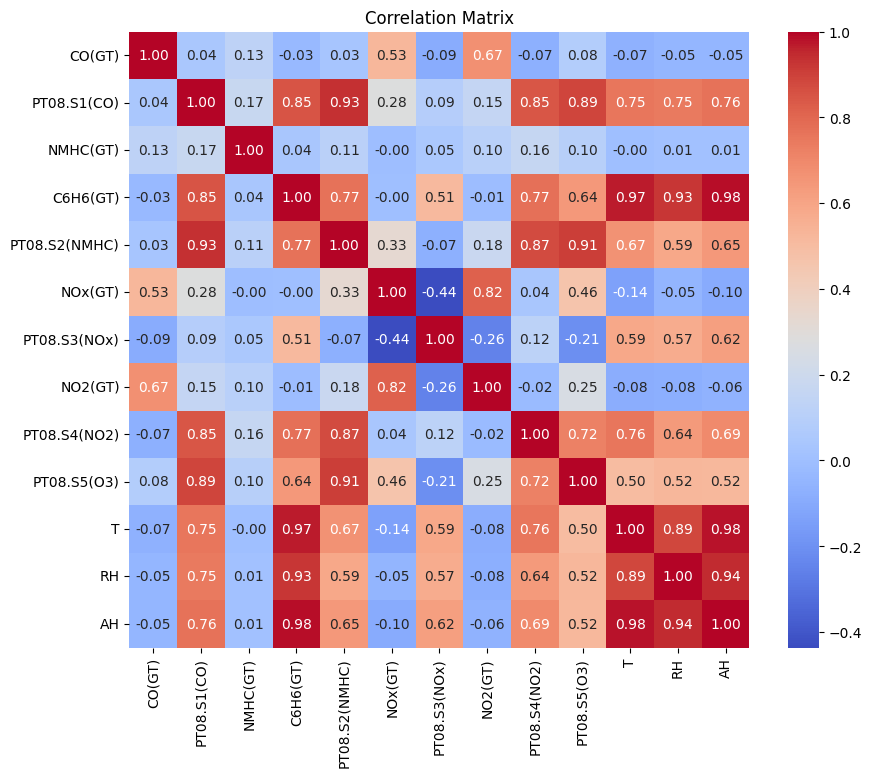

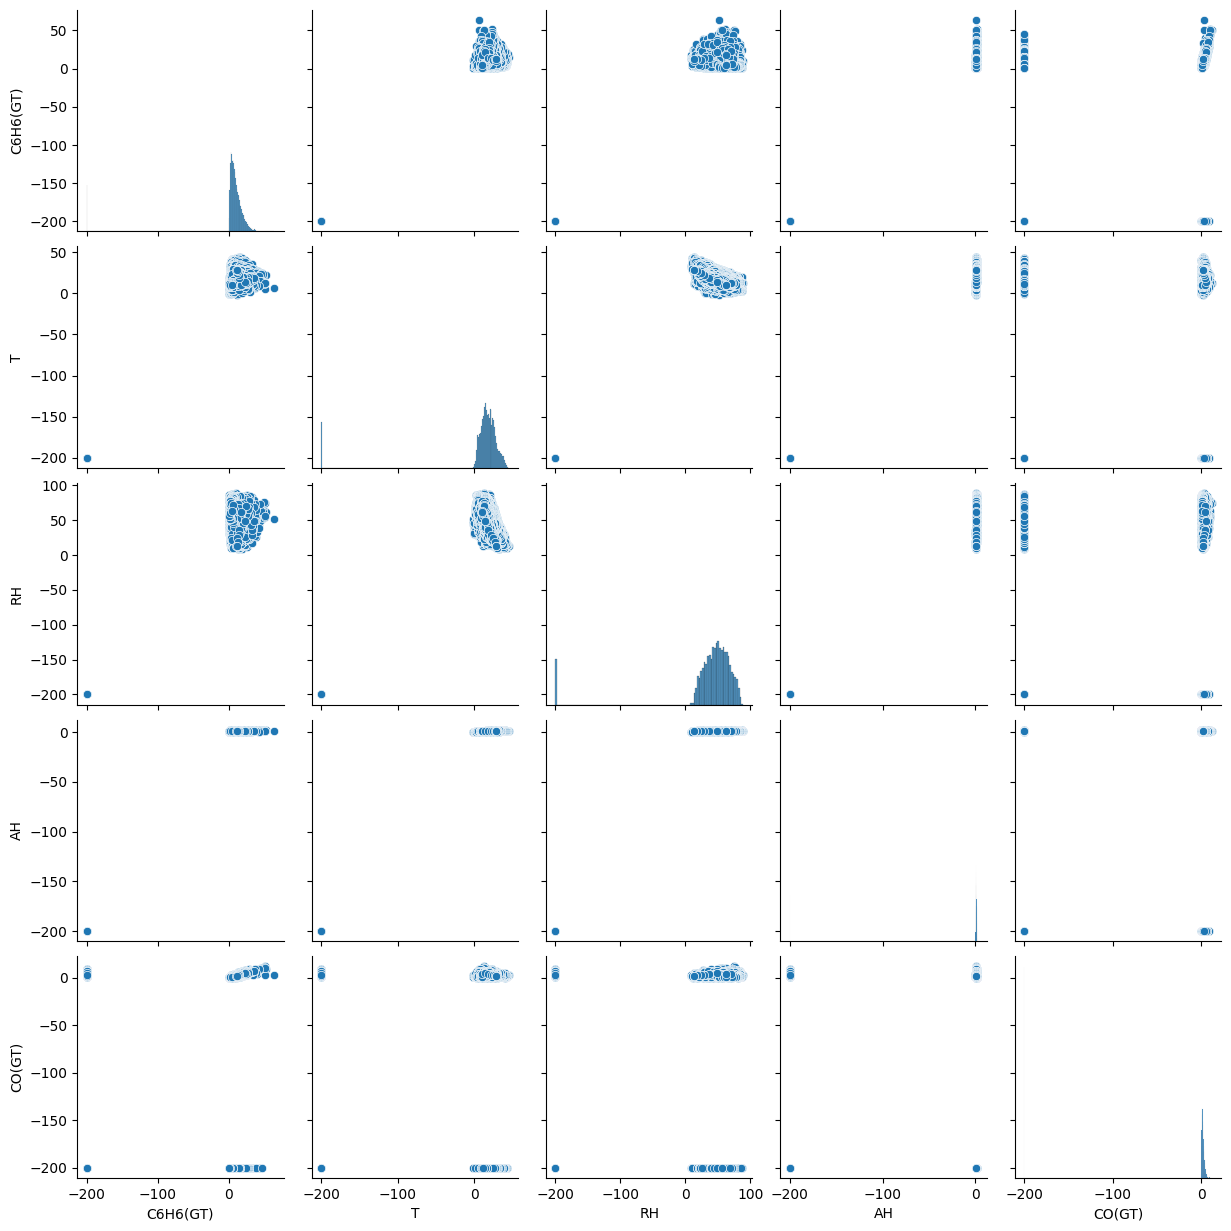

In [ ]:
# Correlation Matrix and Pair Plot:

!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = data

numeric_features = df.select_dtypes(include=np.number).columns.tolist()
corr_matrix = df[numeric_features].corr()

# Heatmap visualization
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(df[['C6H6(GT)', 'T', 'RH', 'AH', 'CO(GT)']])
plt.show()

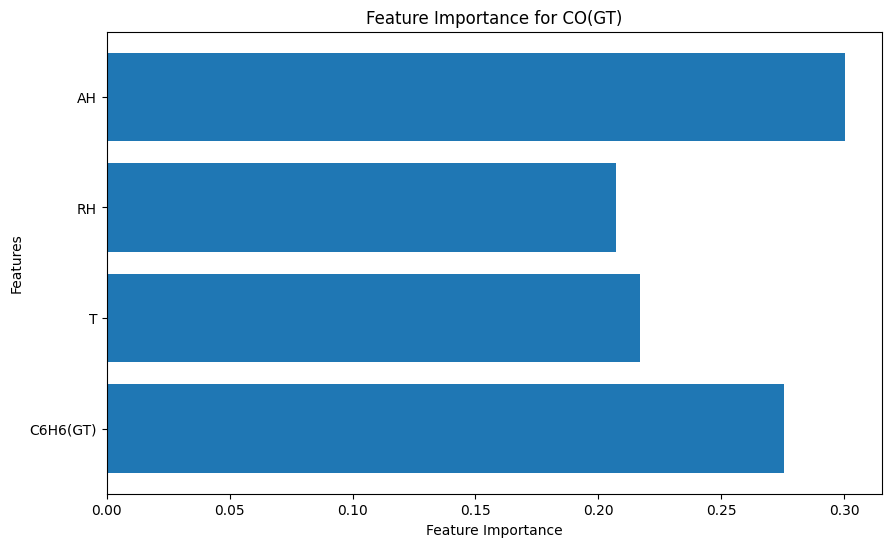

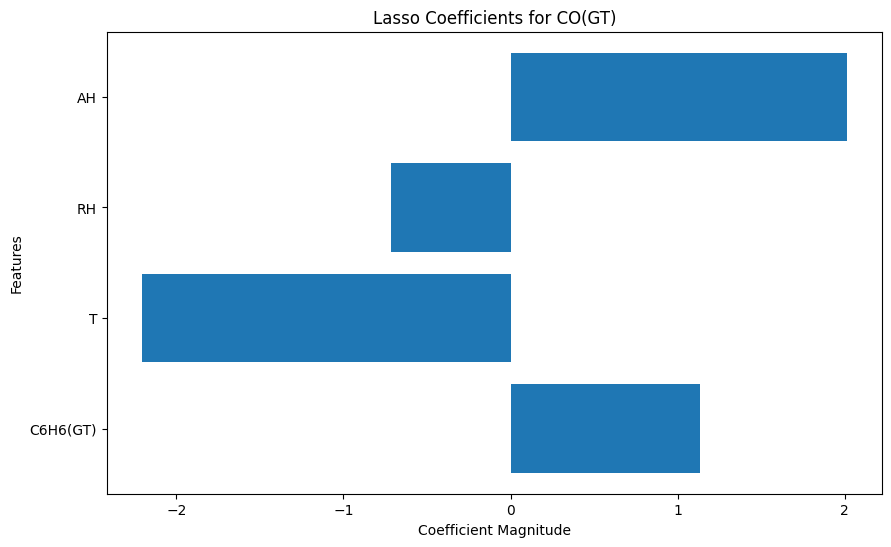

In [ ]:
# Feature Importance for Impact on CO(GT):

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train a Random Forest model
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importance
importance = rf.feature_importances_

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(X.coloums, important)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for CO(GT)')
plt.show()

!pip install scikit-learn

from sklearn.linear_model import Lasso
import numpy as np

# Train Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Get the coefficients
lasso_coef = lasso.coef_

# Plot the coefficients
plt.figure(figsize=(10,6))
plt.barh(X.columns, lasso_coef)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Lasso Coefficients for CO(GT)')
plt.show()


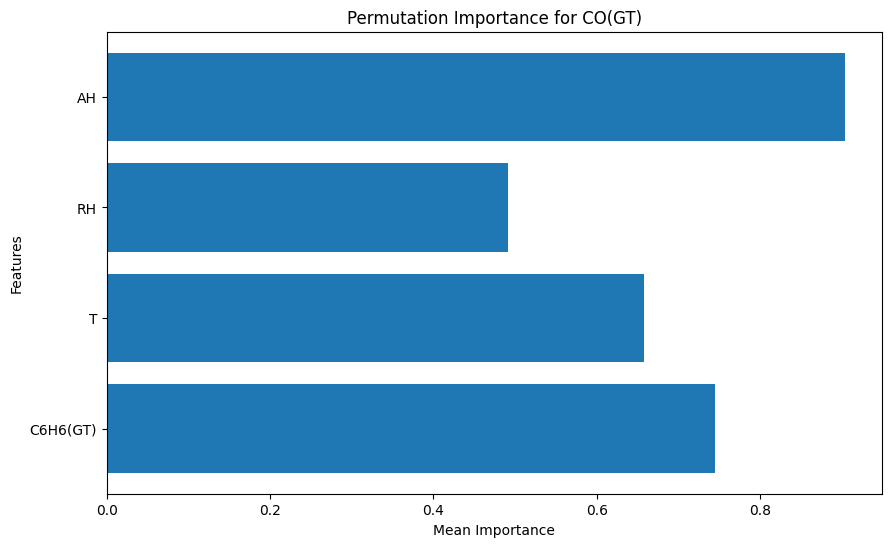

In [ ]:
# Permutation Importance:

from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(rf, X, y)

# Plot the results
plt.figure(figsize=(10,6))
plt.barh(X.columns, perm_importance.importances_mean)
plt.xlabel('Mean Importance')
plt.ylabel('Features')
plt.title('Permutation Importance for CO(GT)')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code for loading and preprocessing data) ...
data = pd.read_excel('/content/AirQualityUCI.xlsx', engine='openpyxl')

# Convert 'Date' and 'Time' columns to datetime objects if they are not already
data['Date'] = pd.to_datetime(data['Date'])
# Change the format string to match the actual format 'HH:MM:SS'
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# Before calculating the correlation, select only numeric features:
numeric_data = data.select_dtypes(include=['number'])

# Now calculate the correlation matrix:
corr_matrix = numeric_data.corr()

# Sort correlation matrix for each variable
for col in corr_matrix.columns:
    # Sort by absolute correlation values
    sorted_values = corr_matrix[col].abs().sort_values(ascending=False)

    # Print or store the sorted values for the current variable
    print(f"Sorted correlations for {col}:\n{sorted_values}\n")

Sorted correlations for CO(GT):
CO(GT)           1.000000
NO2(GT)          0.671140
NOx(GT)          0.526450
NMHC(GT)         0.128351
PT08.S3(NOx)     0.089981
PT08.S5(O3)      0.080316
PT08.S4(NO2)     0.073721
T                0.068952
RH               0.048231
AH               0.045892
PT08.S1(CO)      0.041415
C6H6(GT)         0.031377
PT08.S2(NMHC)    0.029939
Name: CO(GT), dtype: float64

Sorted correlations for PT08.S1(CO):
PT08.S1(CO)      1.000000
PT08.S2(NMHC)    0.933101
PT08.S5(O3)      0.892436
C6H6(GT)         0.852659
PT08.S4(NO2)     0.845133
AH               0.764866
T                0.754806
RH               0.745344
NOx(GT)          0.278029
NMHC(GT)         0.170009
NO2(GT)          0.154058
PT08.S3(NOx)     0.086931
CO(GT)           0.041415
Name: PT08.S1(CO), dtype: float64

Sorted correlations for NMHC(GT):
NMHC(GT)         1.000000
PT08.S1(CO)      0.170009
PT08.S4(NO2)     0.162689
CO(GT)           0.128351
PT08.S2(NMHC)    0.110097
NO2(GT)          0.103345


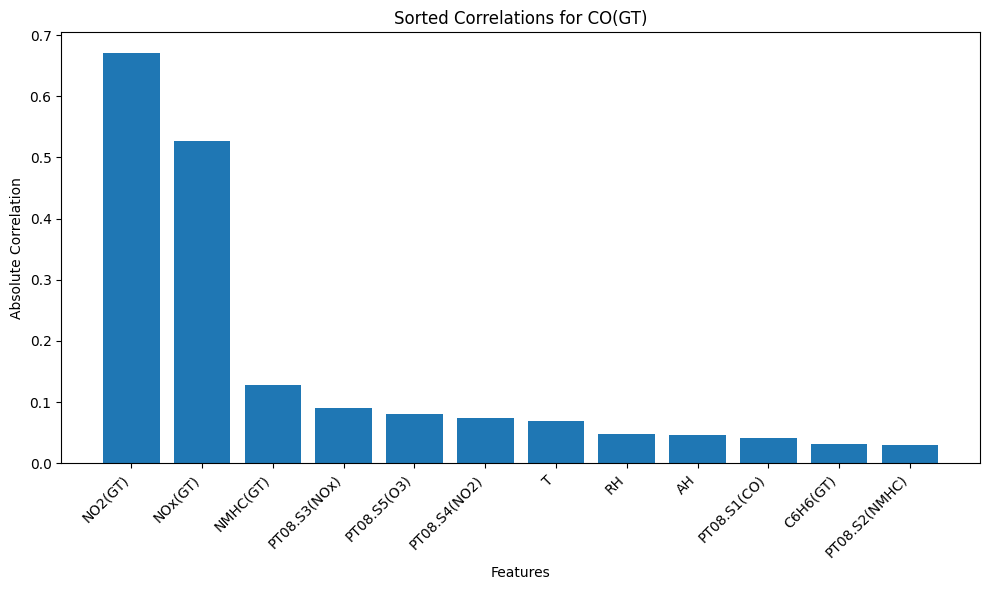

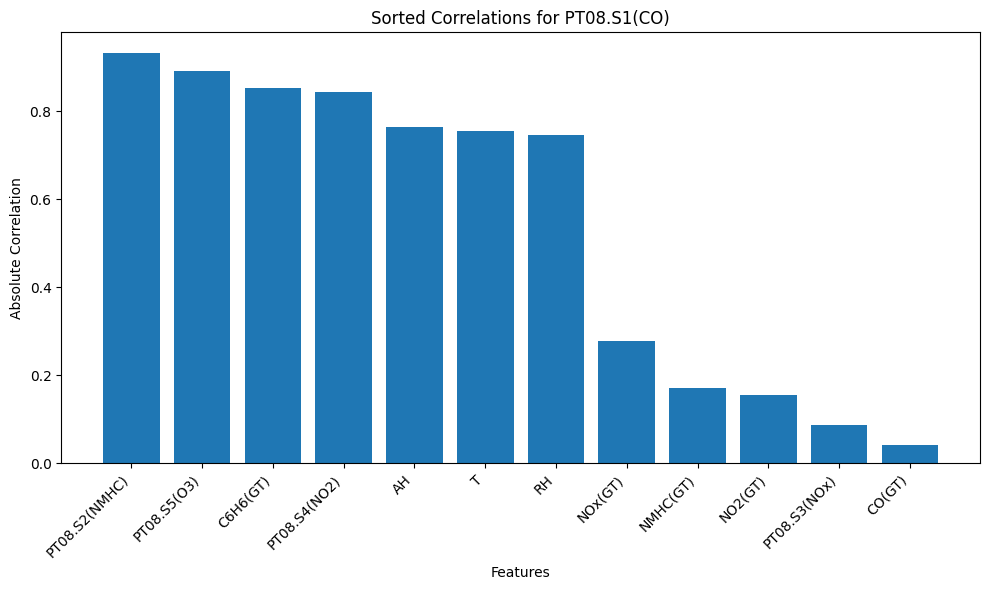

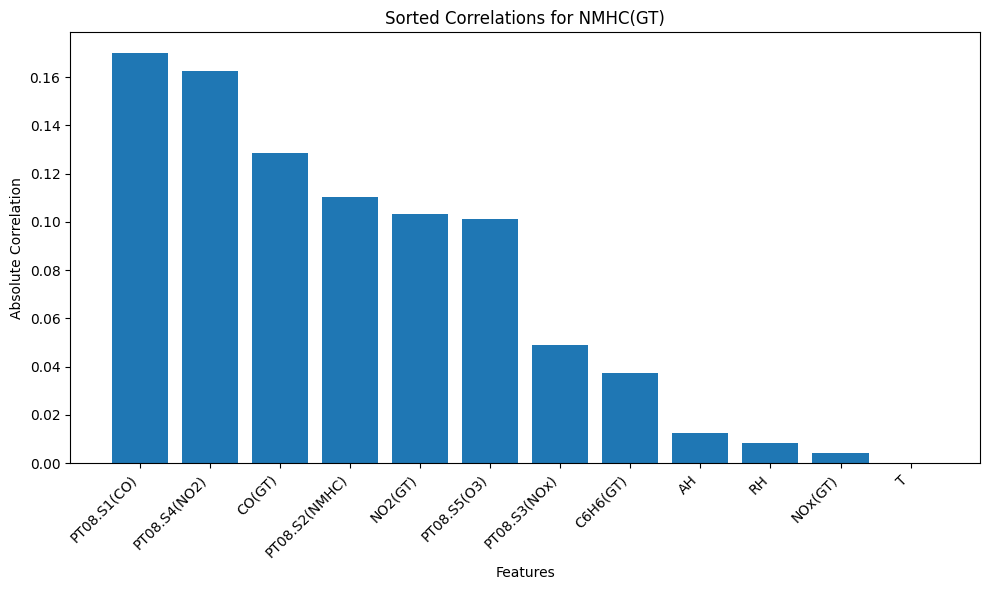

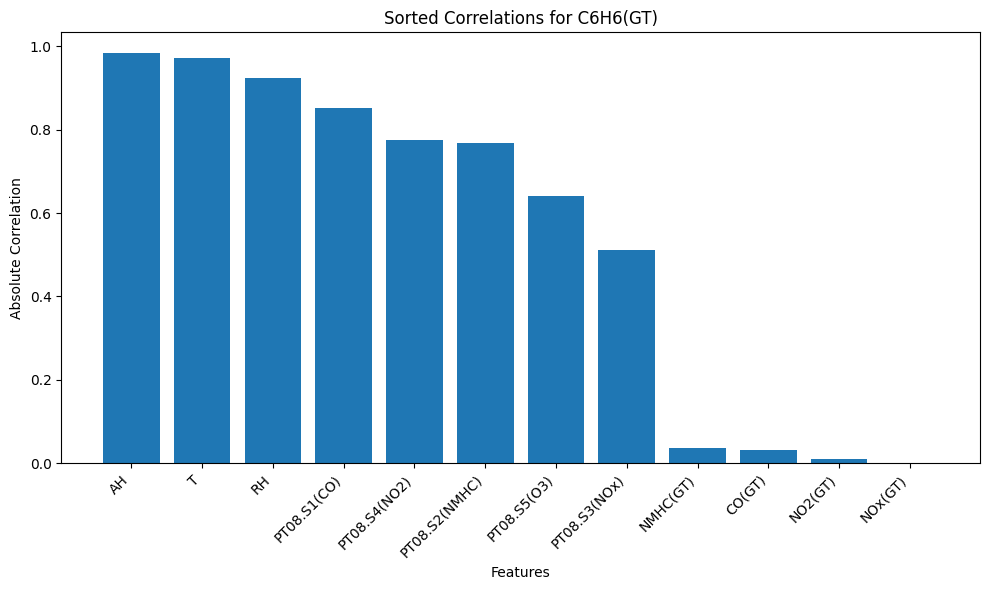

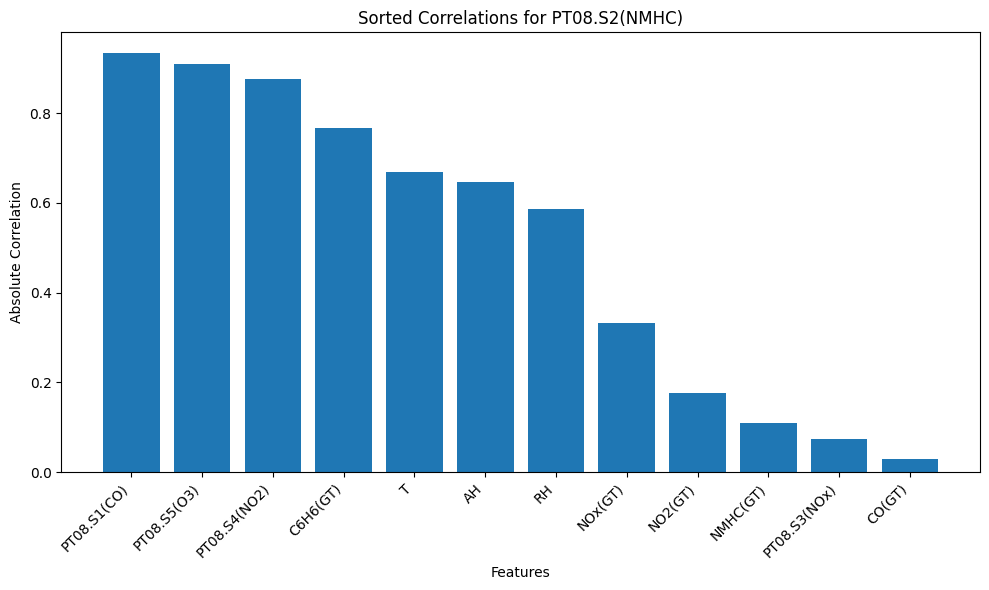

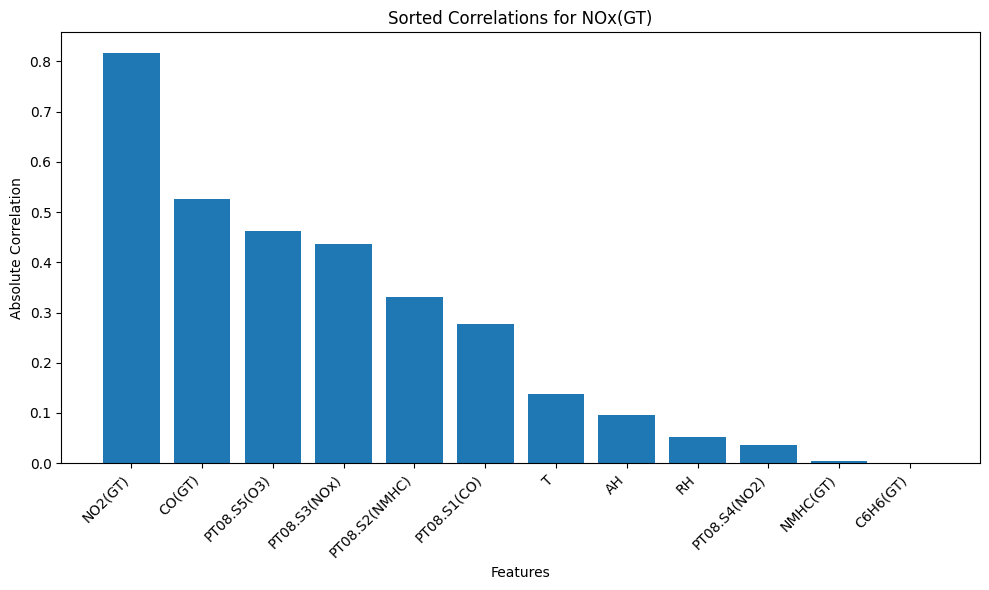

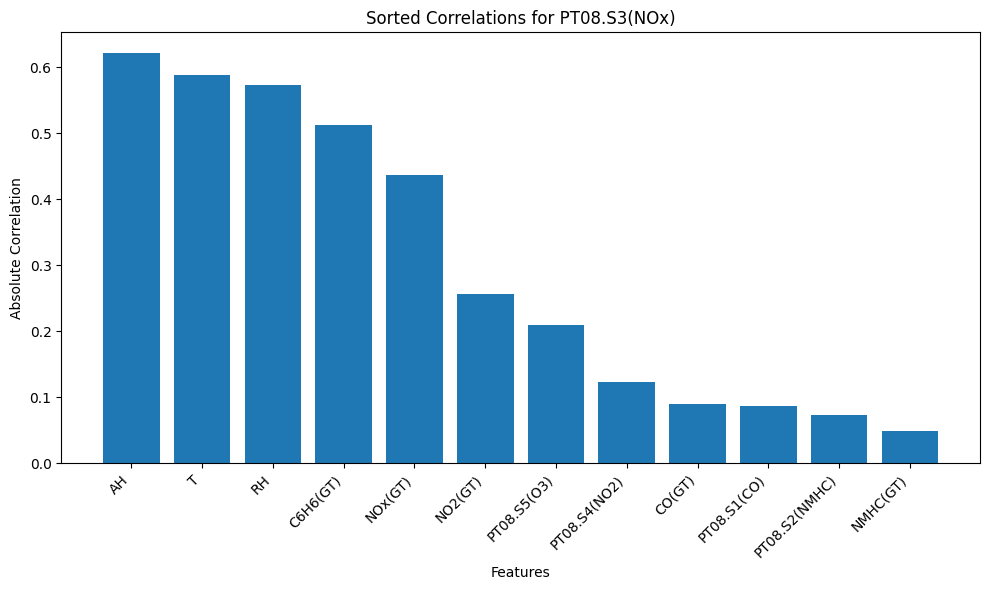

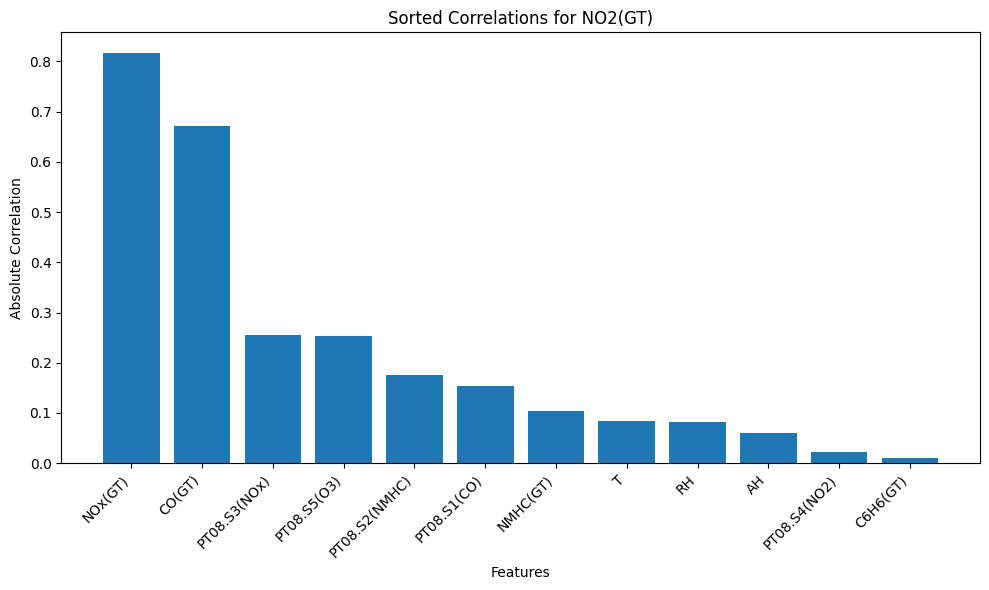

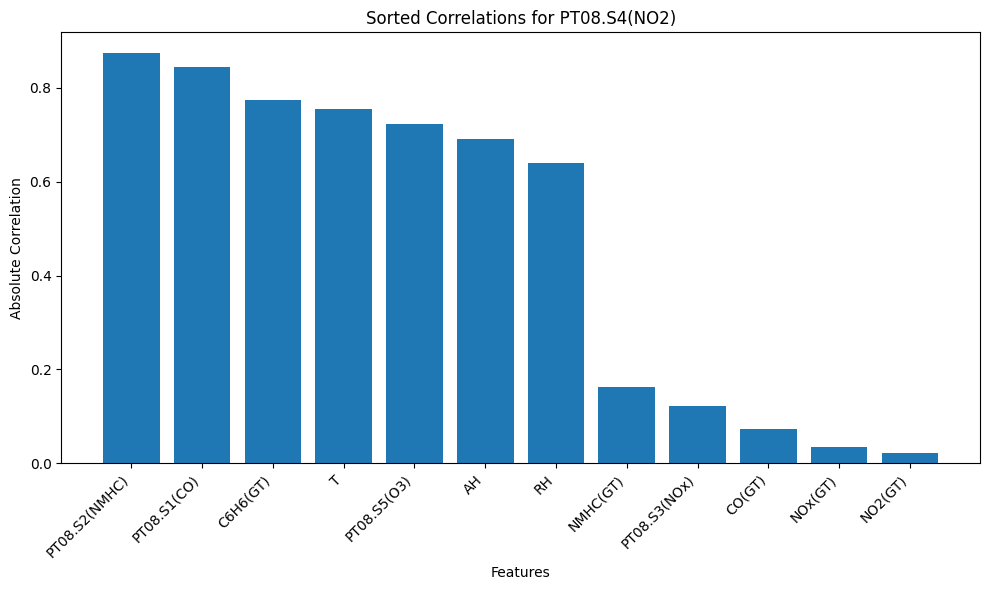

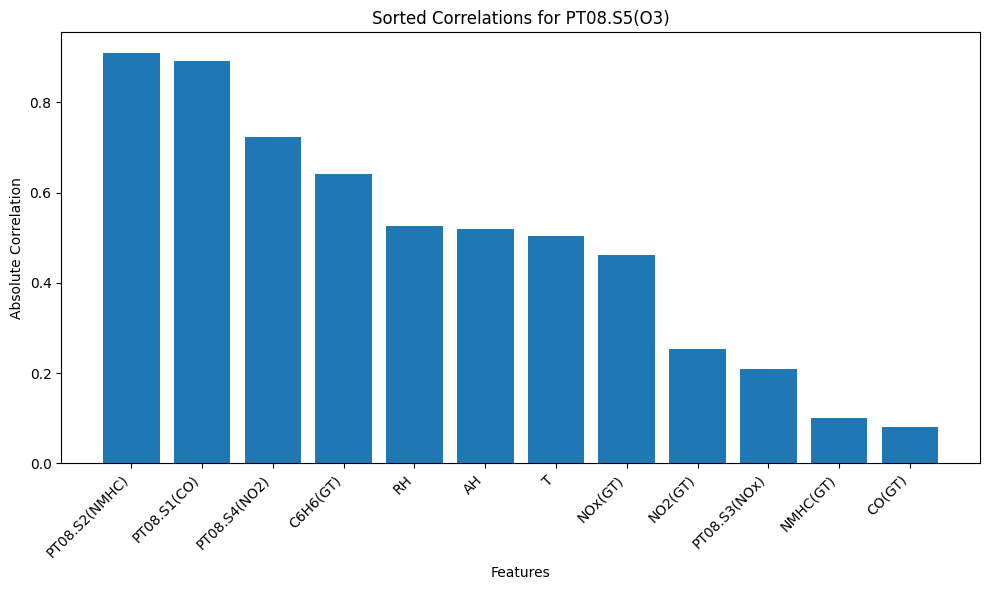

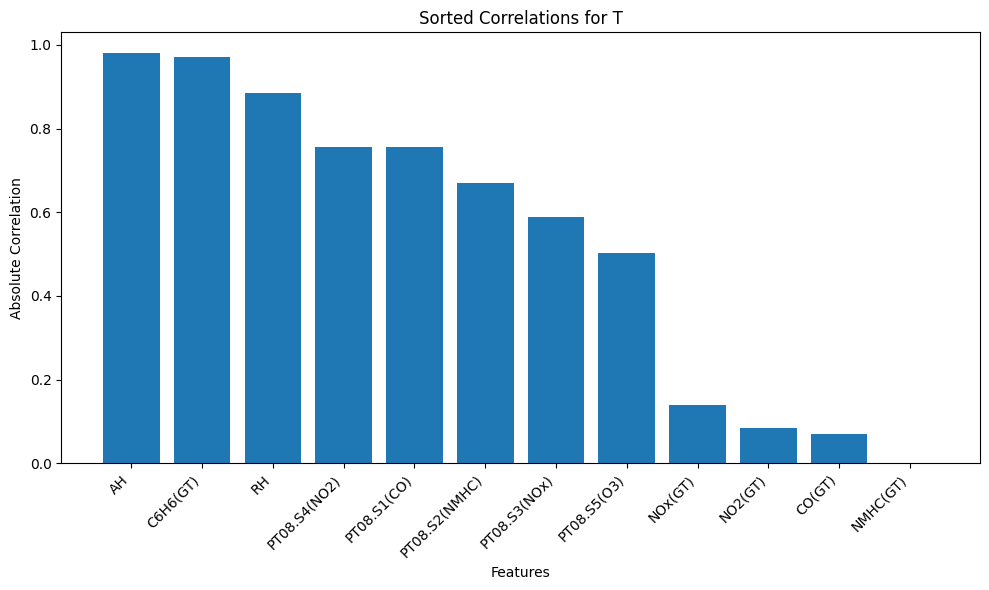

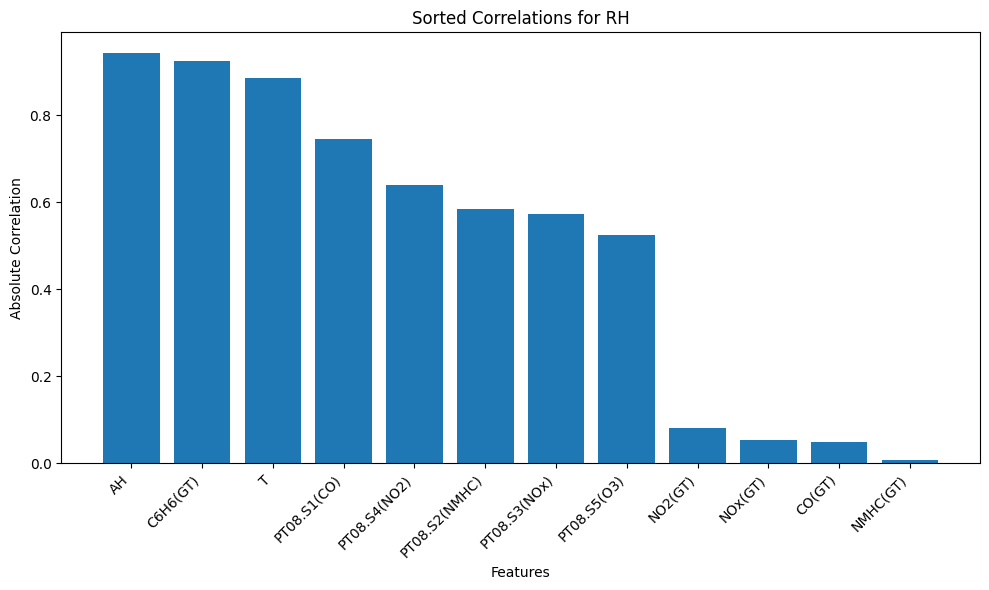

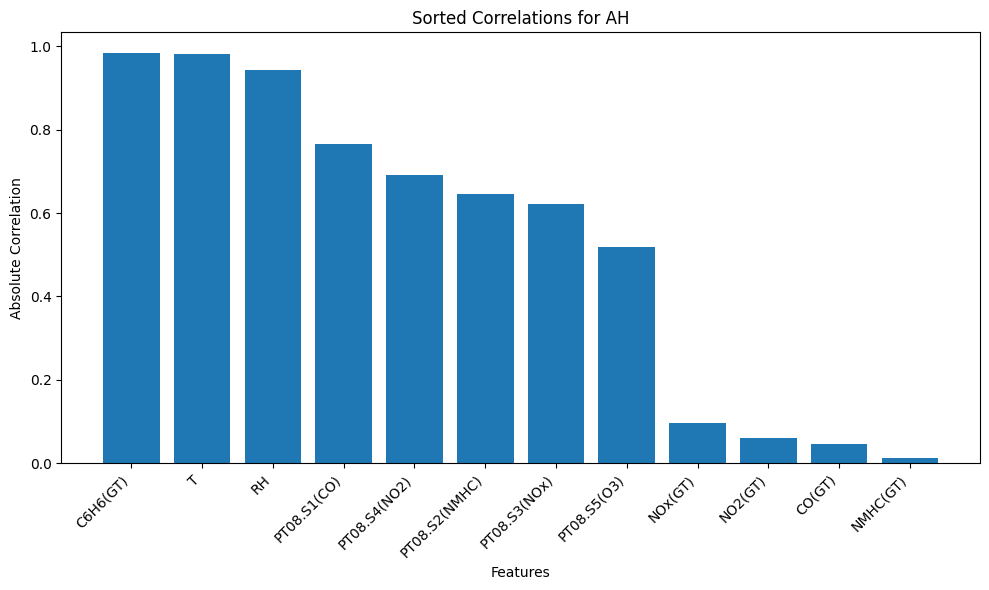

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code for loading and preprocessing data) ...
data = pd.read_excel('/content/AirQualityUCI.xlsx', engine='openpyxl')

# Convert 'Date' and 'Time' columns to datetime objects if they are not already
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# Before calculating the correlation, select only numeric features:
numeric_data = data.select_dtypes(include=['number'])

# Now calculate the correlation matrix:
corr_matrix = numeric_data.corr()

# Iterate through each variable and plot sorted correlations
for col in corr_matrix.columns:
    # Sort by absolute correlation values
    sorted_values = corr_matrix[col].abs().sort_values(ascending=False)

    # Exclude the correlation of the variable with itself (which is always 1)
    sorted_values = sorted_values[sorted_values.index != col]

    # Create a bar plot
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.bar(sorted_values.index, sorted_values.values)
    plt.xlabel('Features')
    plt.ylabel('Absolute Correlation')
    plt.title(f'Sorted Correlations for {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

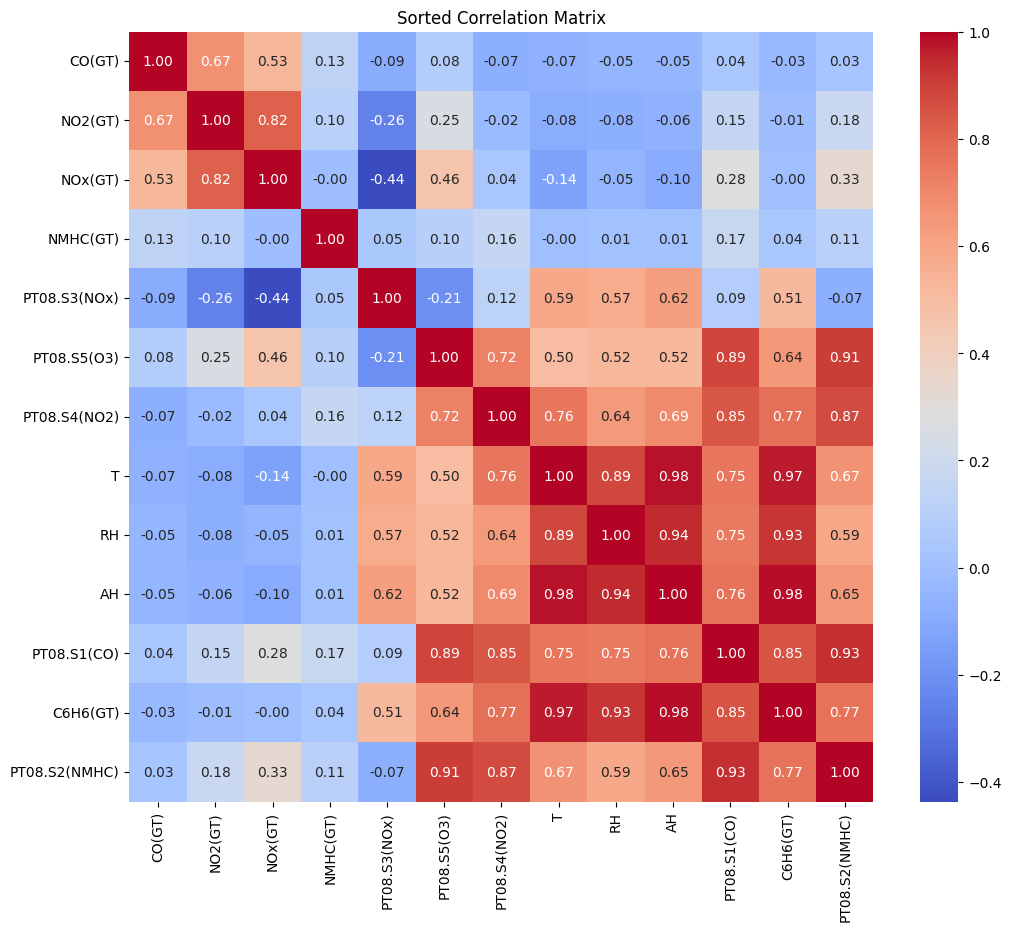

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ... (your existing code for loading and preprocessing data) ...
data = pd.read_excel('/content/AirQualityUCI.xlsx', engine='openpyxl')

# Convert 'Date' and 'Time' columns to datetime objects if they are not already
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# Before calculating the correlation, select only numeric features:
numeric_data = data.select_dtypes(include=['number'])

# Now calculate the correlation matrix:
corr_matrix = numeric_data.corr()

# Sort the columns of the correlation matrix based on the absolute correlation with the target variable
target_variable = 'CO(GT)'  # Replace with your actual target variable
sorted_cols = corr_matrix.abs().sort_values(by=target_variable, ascending=False).index

# Reorder the correlation matrix based on sorted columns
sorted_corr_matrix = corr_matrix.loc[sorted_cols, sorted_cols]

# Heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(sorted_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Sorted Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd

# Load the data
data = pd.read_excel('/content/AirQualityUCI.xlsx', engine='openpyxl')

# Convert 'Date' and 'Time' columns to datetime objects if they are not already
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# Assuming your data is in a pandas DataFrame called 'data'
features = ['C6H6(GT)', 'T', 'RH', 'AH', 'PT08.S1(CO)']  # Features used for prediction
for feature in features:
    std_dev = data[feature].std()
    print(f"Standard Deviation of {feature}: {std_dev:.2f}")

Standard Deviation of C6H6(GT): 41.38
Standard Deviation of T: 43.20
Standard Deviation of RH: 51.22
Standard Deviation of AH: 38.98
Standard Deviation of PT08.S1(CO): 329.82


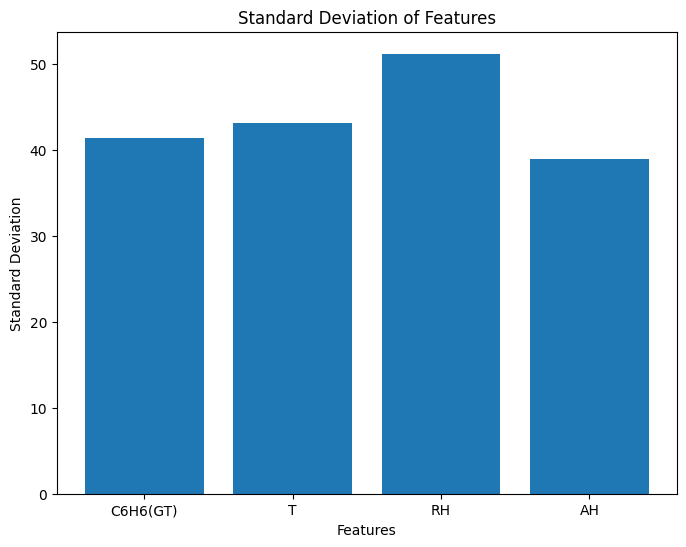

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('/content/AirQualityUCI.xlsx', engine='openpyxl')

# Convert 'Date' and 'Time' columns to datetime objects if they are not already
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# Assuming your data is in a pandas DataFrame called 'data'
features = ['C6H6(GT)', 'T', 'RH', 'AH',]  # Features used for prediction
#features
# Calculate standard deviations
std_devs = [data[feature].std() for feature in features]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(features, std_devs)
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Features')
plt.show()

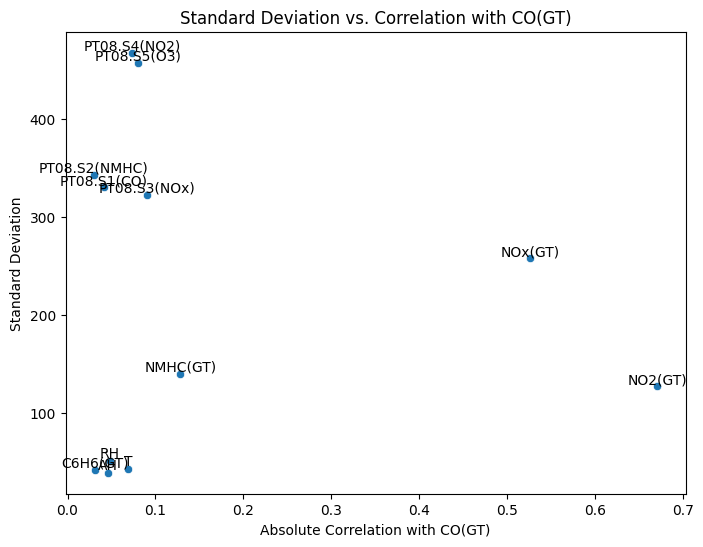

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('/content/AirQualityUCI.xlsx', engine='openpyxl')

# Convert 'Date' and 'Time' columns to datetime objects if they are not already
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# Before calculating the correlation, select only numeric features:
numeric_data = data.select_dtypes(include=['number'])

# Now calculate the correlation matrix:
corr_matrix = numeric_data.corr()

# Specify the target variable for correlation
target_variable = 'CO(GT)'  # Replace with your actual target variable

# Get absolute correlation values with the target variable
correlations = corr_matrix[target_variable].abs().drop(target_variable)

# Calculate standard deviations for each feature
std_devs = numeric_data.drop(columns=[target_variable]).std()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Correlation': correlations, 'Std Dev': std_devs})

# Scatter plot of Standard Deviation vs. Correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Correlation', y='Std Dev', data=plot_data)
plt.title(f'Standard Deviation vs. Correlation with {target_variable}')
plt.xlabel(f'Absolute Correlation with {target_variable}')
plt.ylabel('Standard Deviation')

# Annotate points with feature names (optional)
for i, row in plot_data.iterrows():
    plt.text(row['Correlation'], row['Std Dev'], i, ha='center', va='bottom')

plt.show()

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the data
data = pd.read_excel('/content/AirQualityUCI.xlsx', engine='openpyxl')

# Convert 'Date' and 'Time' columns to datetime objects if they are not already
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# Before calculating the correlation, select only numeric features:
numeric_data = data.select_dtypes(include=['number'])

# Specify the target variable
target_variable = 'CO(GT)'  # Replace with your actual target variable

# Define the features (predictor variables)
features = numeric_data.columns.drop(target_variable)

# Modify column names to be valid Python variable names for the formula
# Replace '.' and '(' and ')' with '_' in column names
numeric_data.columns = numeric_data.columns.str.replace('.', '_').str.replace('(', '_').str.replace(')', '_')
# Update target_variable to match the modified column name
target_variable = target_variable.replace('.', '_').replace('(', '_').replace(')', '_') # Change to the modified name

# Update features list using the modified column names
features = numeric_data.columns.drop(target_variable)


# Build the regression formula string
formula = f"{target_variable} ~ {' + '.join(features)}"

# Fit the OLS (Ordinary Least Squares) regression model
model = smf.ols(formula, data=numeric_data).fit()

# Print the standardized coefficients (beta weights)
print(model.params)  # Print all coefficients including the intercept
print("\nStandard deviation (Beta Weights):")
for feature, coef in zip(features, model.params[1:]):  # Exclude the intercept
    std_dev_feature = numeric_data[feature].std()
    std_dev_target = numeric_data[target_variable].std()
    beta_weight = coef * (std_dev_feature / std_dev_target)
    print(f"{feature}: {beta_weight:.3f}")

Intercept       -48.310769
PT08_S1_CO_      -0.005505
NMHC_GT_          0.049295
C6H6_GT_         -0.443971
PT08_S2_NMHC_    -0.013236
NOx_GT_           0.036372
PT08_S3_NOx_      0.011873
NO2_GT_           0.385446
PT08_S4_NO2_     -0.002396
PT08_S5_O3_      -0.009794
T                 0.463551
RH                0.237793
AH               -0.200399
dtype: float64

Standard deviation (Beta Weights):
PT08_S1_CO_: -0.023
NMHC_GT_: 0.089
C6H6_GT_: -0.237
PT08_S2_NMHC_: -0.058
NOx_GT_: 0.121
PT08_S3_NOx_: 0.049
NO2_GT_: 0.630
PT08_S4_NO2_: -0.014
PT08_S5_O3_: -0.058
T: 0.258
RH: 0.157
AH: -0.101


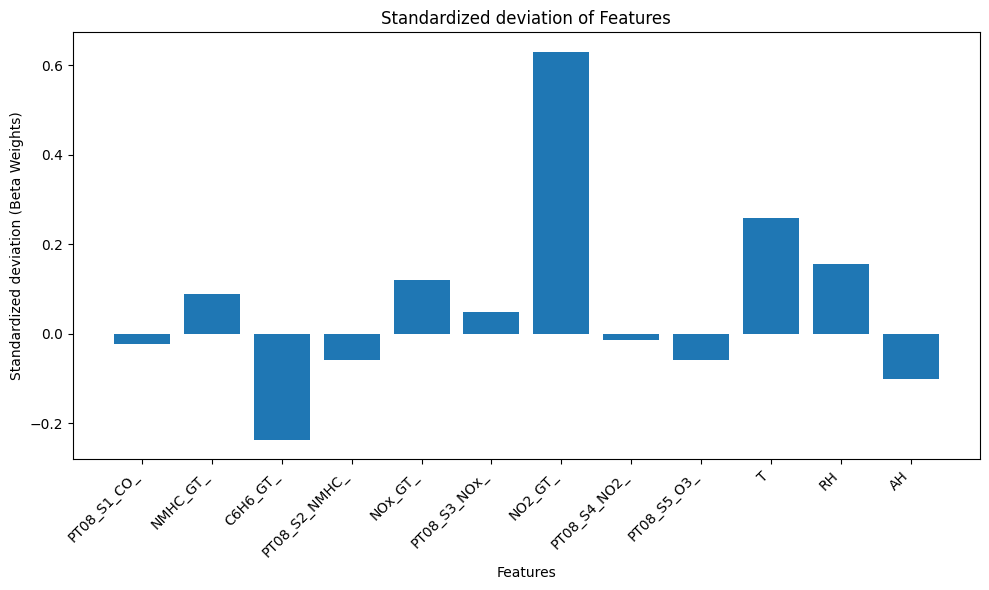

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('/content/AirQualityUCI.xlsx', engine='openpyxl')

# Convert 'Date' and 'Time' columns to datetime objects if they are not already
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# Before calculating the correlation, select only numeric features:
numeric_data = data.select_dtypes(include=['number'])

# Specify the target variable
target_variable = 'CO(GT)'  # Replace with your actual target variable

# Define the features (predictor variables)
features = numeric_data.columns.drop(target_variable)

# Modify column names to be valid Python variable names for the formula
# Replace '.' and '(' and ')' with '_' in column names
numeric_data.columns = numeric_data.columns.str.replace('.', '_').str.replace('(', '_').str.replace(')', '_')
# Update target_variable to match the modified column name
target_variable = target_variable.replace('.', '_').replace('(', '_').replace(')', '_') # Change to the modified name

# Update features list using the modified column names
features = numeric_data.columns.drop(target_variable)


# Build the regression formula string
formula = f"{target_variable} ~ {' + '.join(features)}"

# Fit the OLS (Ordinary Least Squares) regression model
model = smf.ols(formula, data=numeric_data).fit()

# Calculate and store standardized coefficients (beta weights)
beta_weights = {}
for feature, coef in zip(features, model.params[1:]):  # Exclude the intercept
    std_dev_feature = numeric_data[feature].std()
    std_dev_target = numeric_data[target_variable].std()
    beta_weight = coef * (std_dev_feature / std_dev_target)
    beta_weights[feature] = beta_weight

# Create a bar plot of standardized coefficients
plt.figure(figsize=(10, 6))
plt.bar(beta_weights.keys(), beta_weights.values())
plt.xlabel('Features')
plt.ylabel('Standardized deviation (Beta Weights)')
plt.title('Standardized deviation of Features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

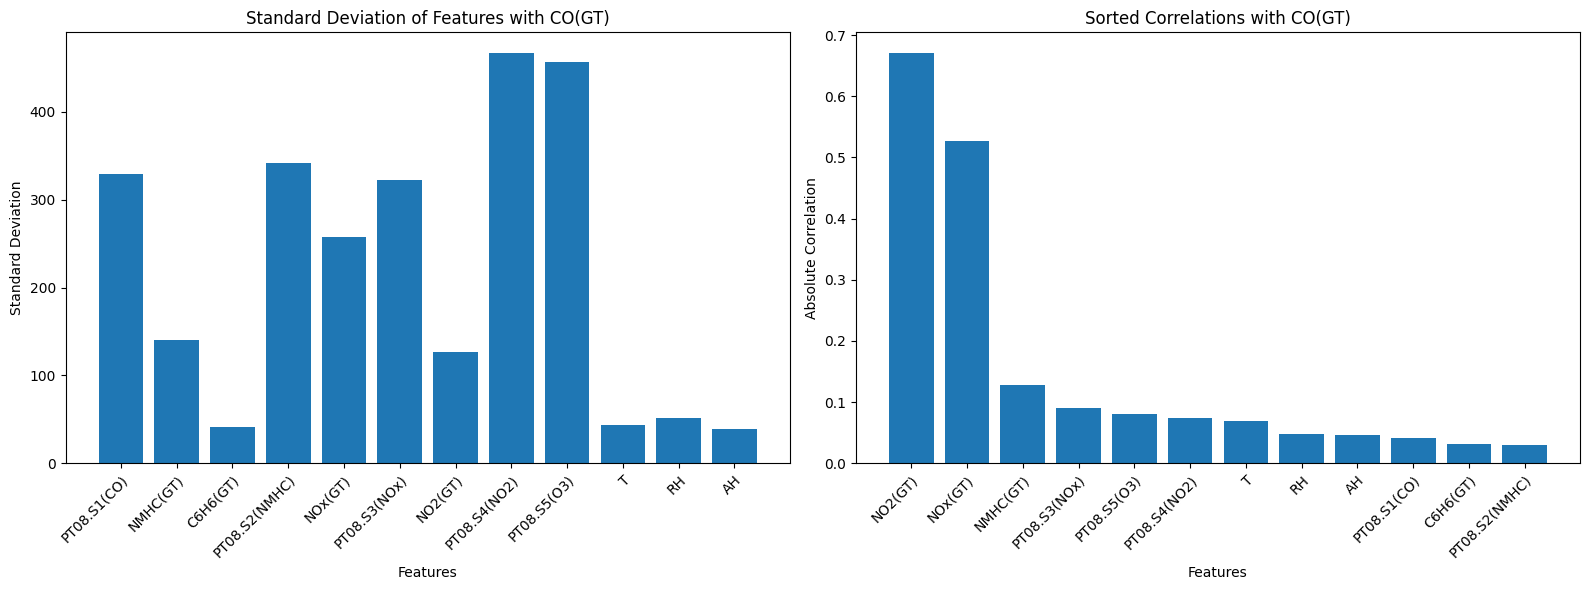

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_excel('/content/AirQualityUCI.xlsx', engine='openpyxl')

data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

# Before calculating the correlation, select only numeric features:
numeric_data = data.select_dtypes(include=['number'])

# Now calculate the correlation matrix:
corr_matrix = numeric_data.corr()

# Specify the target variable for correlation
target_variable = 'CO(GT)'

# Define the features (predictor variables) - THIS IS THE ADDED LINE
features = numeric_data.columns.drop(target_variable)

# Calculate standard deviations for each feature
std_devs = numeric_data.drop(columns=[target_variable]).std()


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust figsize as needed

# Subplot 1: Standard Deviation
axes[0].bar(features, std_devs)
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('Standard Deviation of Features with CO(GT)')
# Rotate and align x-axis tick labels
axes[0].tick_params(axis='x', rotation=45)  # Remove ha='right'
plt.setp(axes[0].get_xticklabels(), ha="right", rotation_mode="anchor") # Use plt.setp and get_xticklabels

correlations = corr_matrix[target_variable].abs().drop(target_variable)
# Sort correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)
axes[1].bar(sorted_correlations.index, sorted_correlations.values)
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Absolute Correlation')
axes[1].set_title(f'Sorted Correlations with {target_variable}')
# Rotate and align x-axis tick labels
axes[1].tick_params(axis='x', rotation=45) #Remove ha='right'
plt.setp(axes[1].get_xticklabels(), ha="right", rotation_mode="anchor") # Use plt.setp and get_xticklabels

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
#break down of pair plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_excel('/content/AirQualityUCI.xlsx', engine='openpyxl')

data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%H:%S').dt.time

numeric_data = data.select_dtypes(include=['number'])

std_devs = numeric_data.drop(columns=[target_variable]).std()

fig, axes = plt.subplots(1,2, figsize=(16,16))


axes[0].bar(features, std_devs)
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Standard Deciation')
axes[0].set_title('Standard Deaviaton of Features with CO(GT)')
axes[0].tick_params(axis='x', rotation=45)
plt.setp(axes[0].get_xtick)

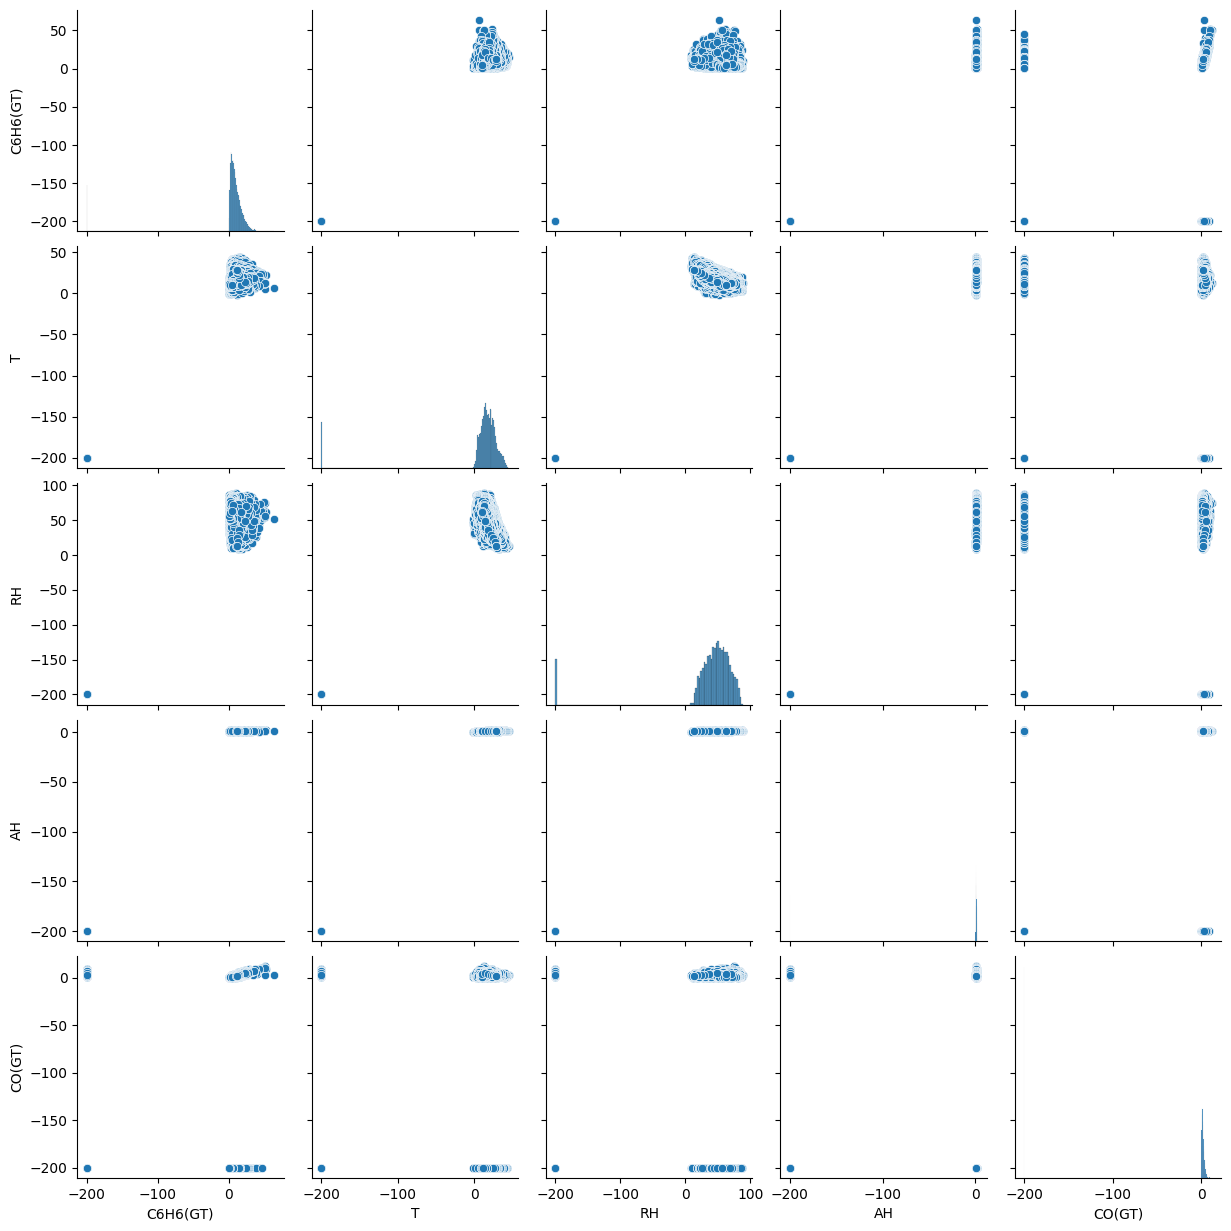

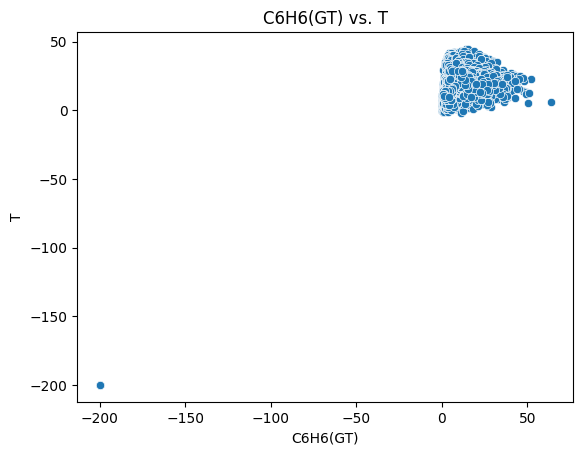

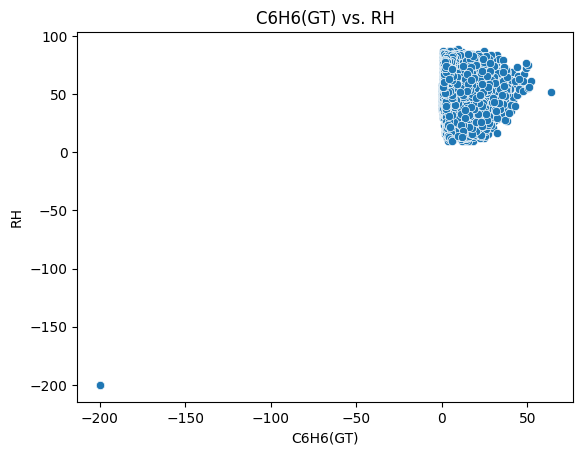

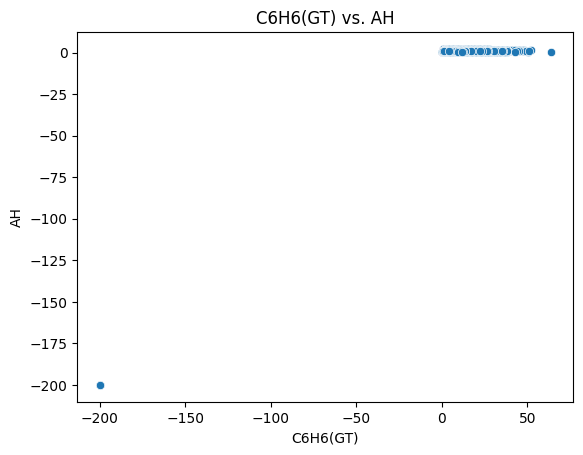

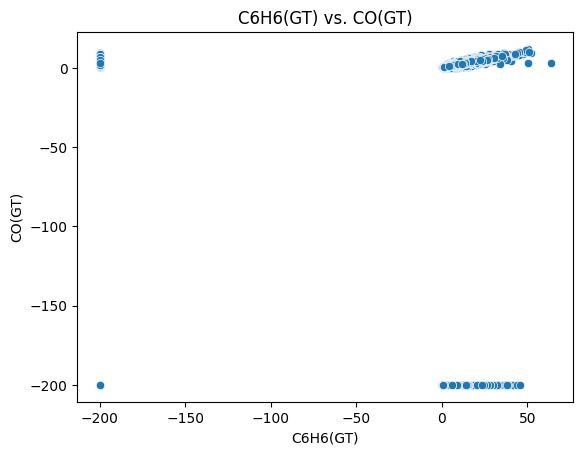

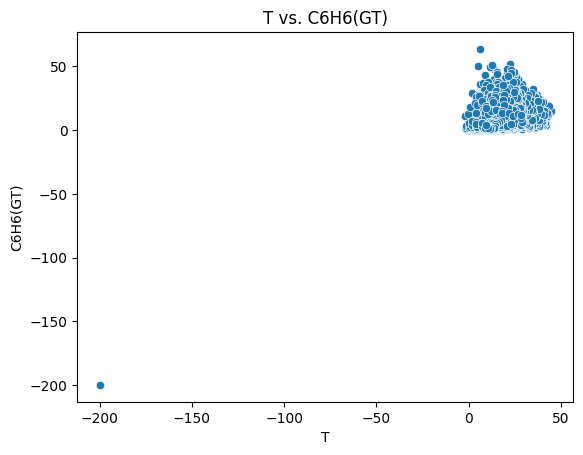

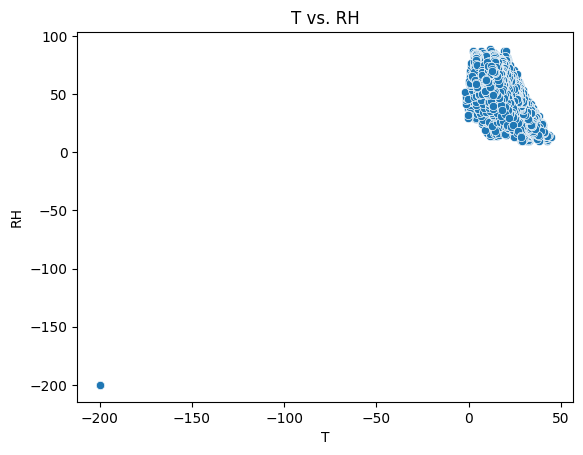

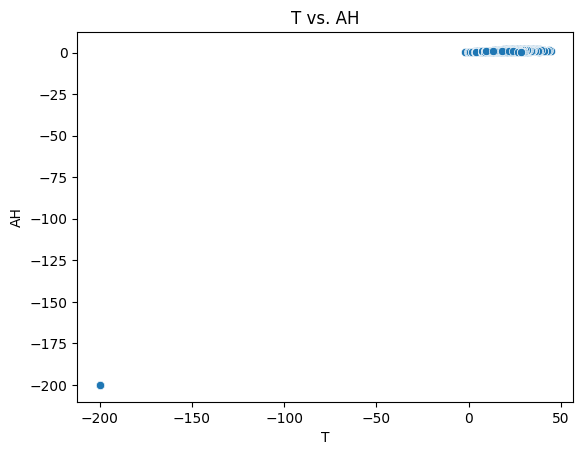

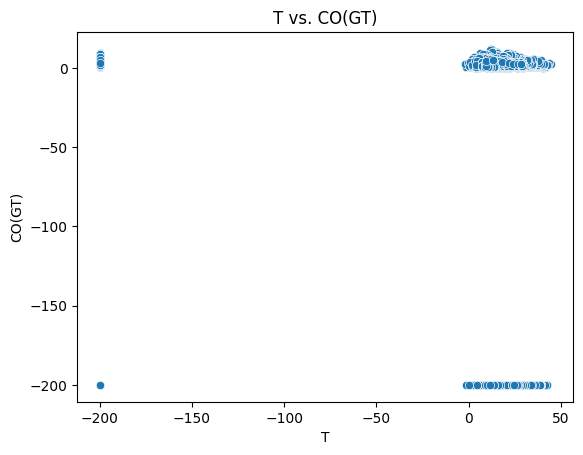

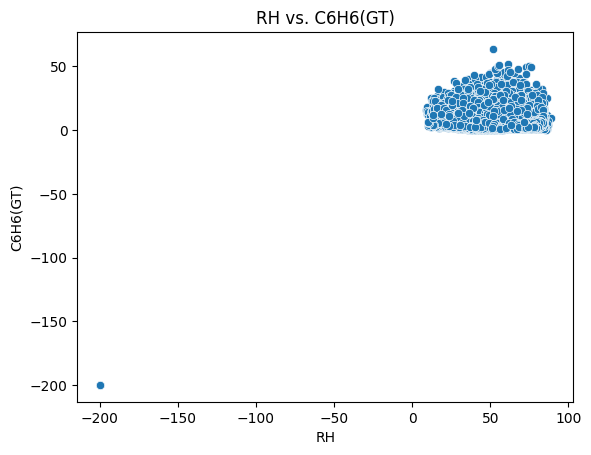

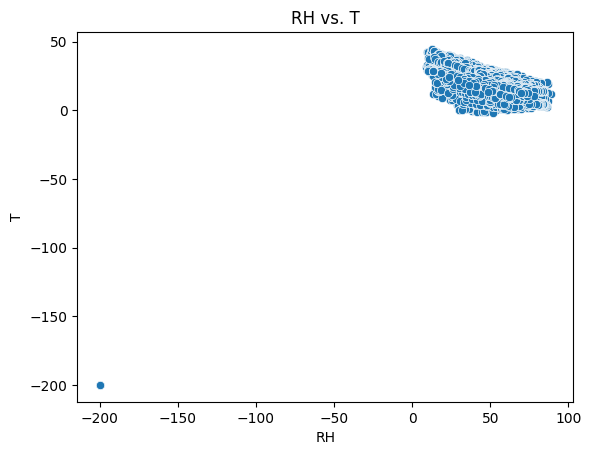

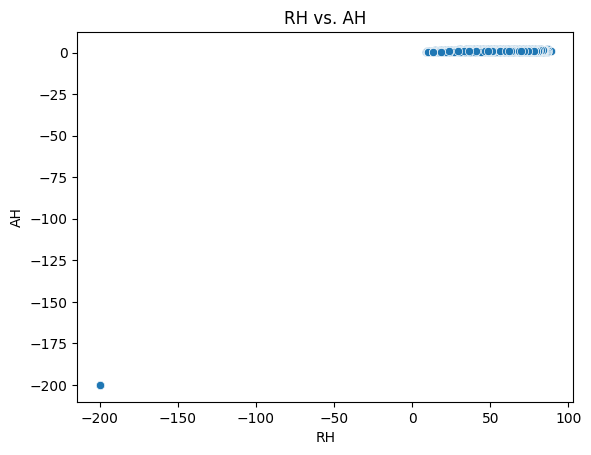

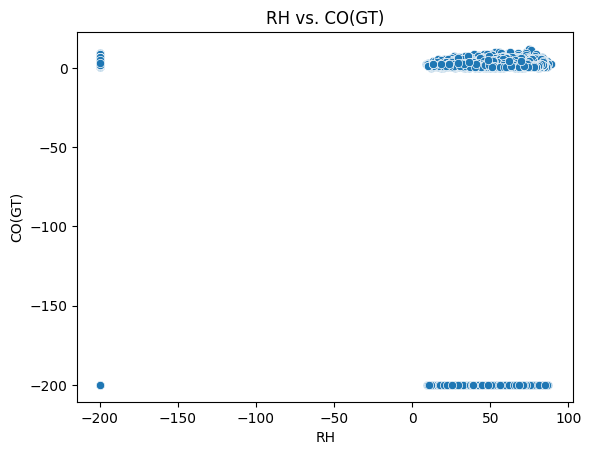

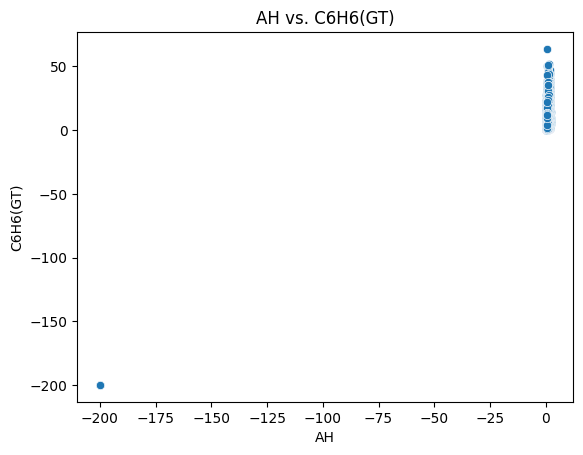

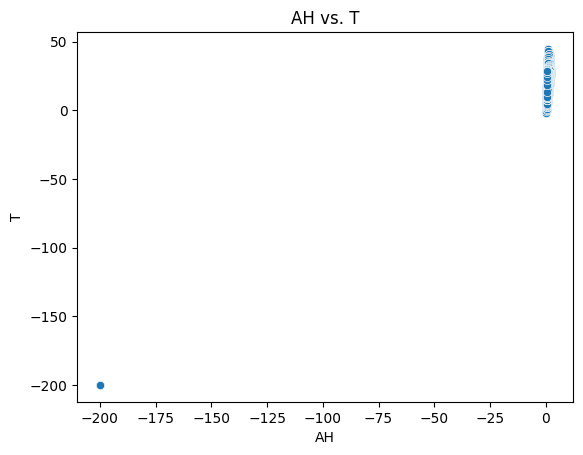

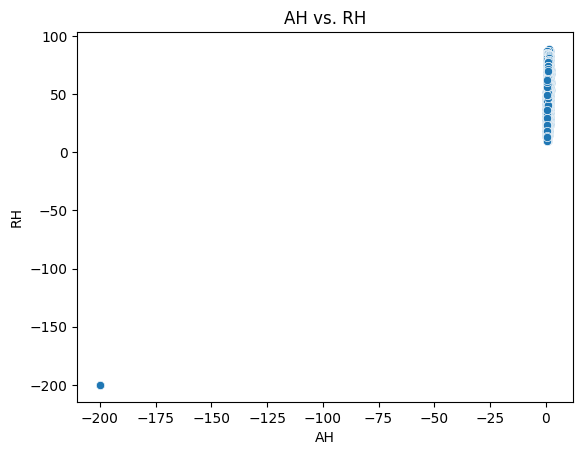

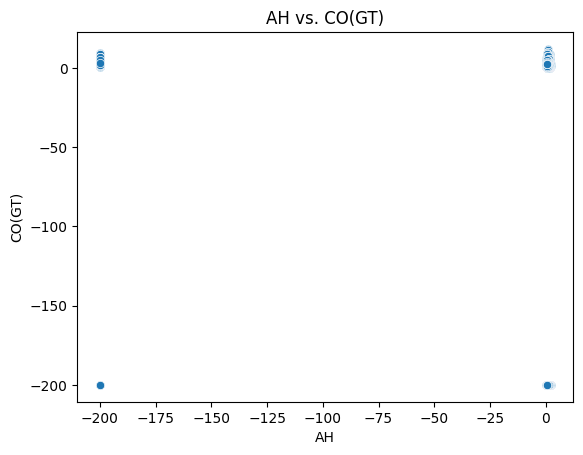

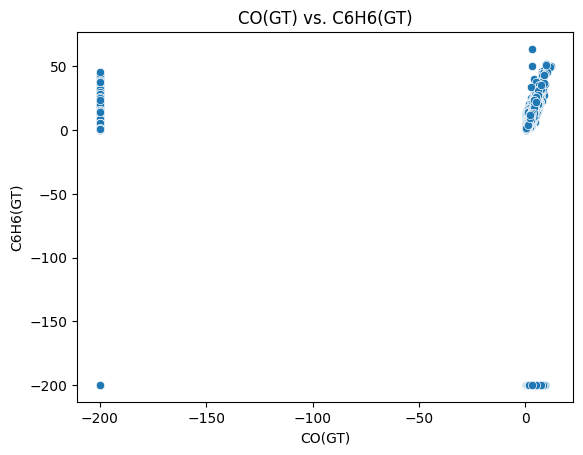

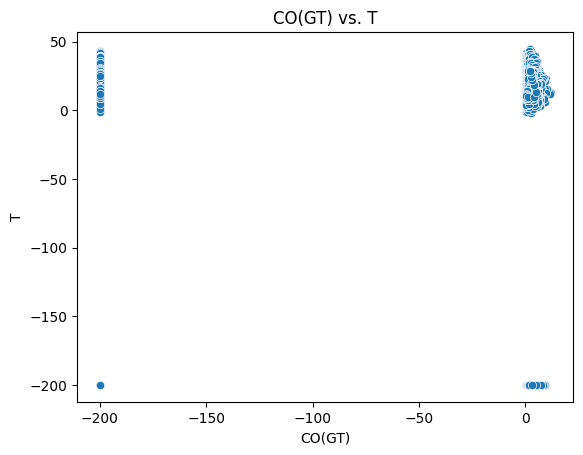

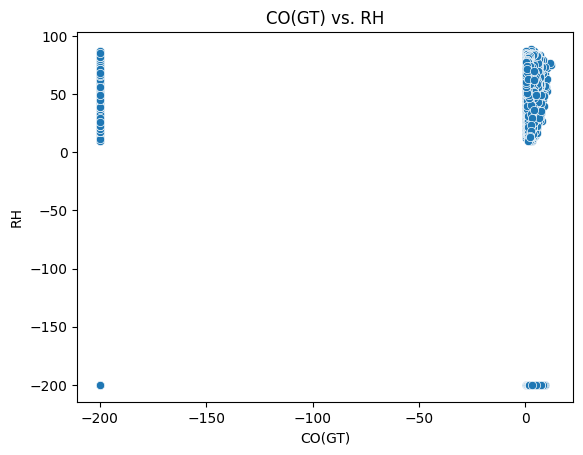

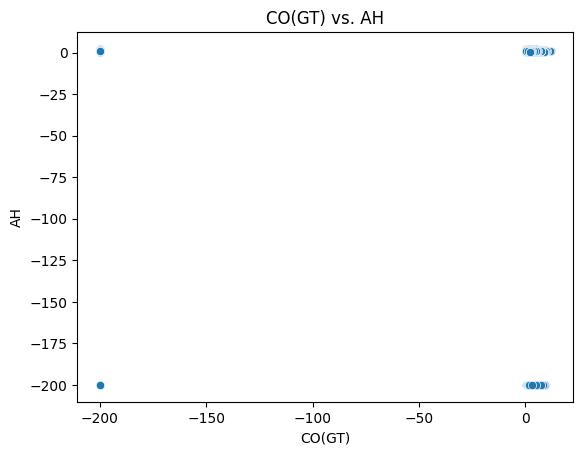

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data  (Assuming this was done in a previous cell)
data = pd.read_excel('/content/AirQualityUCI.xlsx', engine='openpyxl')

# Use 'data' instead of 'df'
sns.pairplot(data[['C6H6(GT)', 'T', 'RH', 'AH', 'CO(GT)']])  # Original pair plot code

# Break down into individual plots
for col1 in ['C6H6(GT)', 'T', 'RH', 'AH', 'CO(GT)']:
    for col2 in ['C6H6(GT)', 'T', 'RH', 'AH', 'CO(GT)']:
        if col1 != col2:  # Avoid plotting a variable against itself
            plt.figure()  # Create a new figure for each plot
            # Use 'data' instead of 'df'
            sns.scatterplot(x=data[col1], y=data[col2])
            plt.title(f'{col1} vs. {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()